All guages have data from 1980-04-07 to 2020-03-31, which should translate to 14604 entries, however, the gauges for regions 11 and 15 are unfortunately missing some values. We will be averaging over months for these gauges when comparing with teleconnection patterns, so want even months. Considering this information, the best approach is likely to drop years 2017, 2018, 2019, and 2020, as well as the month of April for 1980 for each guage when combining/comparing data.

Region 11 (14397 entries):
- 2017 = 358 rows; should be 365; missing from 2017-10-03 to 2017-10-09
- 2018 = 188 rows; should be 365
- 2019 = 357 rows; should be 365
- 2020 = 76 rows; should be 91

Region 15 (14597 entries):
- 2017 = 358 rows; should be 365; missing 2017-01-13 to 2017-01-19

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL

## Acquire Gauge Region Data

In [2]:
df_regions = pd.read_csv(
    "../Data/Streamflow_Drought_Data/Unregulated_Gauges_Regions.csv",
    dtype={"site": "string"}
)
df_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   site        70 non-null     string 
 1   DRAIN_SQKM  70 non-null     float64
 2   HUC02       70 non-null     object 
dtypes: float64(1), object(1), string(1)
memory usage: 1.8+ KB


In [3]:
df_regions.describe()

DRAIN_SQKM
count    70.000000
mean    419.722857
std     995.449282
min       2.200000
25%      45.400000
50%     163.150000
75%     402.650000
max    6783.600000

In [4]:
df_regions.head(10)

site  DRAIN_SQKM HUC02
0  06191500      6783.6   10U
1  06224000       484.9   10U
2  06280300       794.0   10U
3  06309200       117.5   10U
4  06614800         4.0   10L
5  06622700        98.7   10L
6  06623800       187.7   10L
7  06632400       163.0   10L
8  06746095         8.9   10L
9  07083000        60.8    11

## Data Analysis for 6 Selected Gauges

In [5]:
selected_gauges = [
    '06224000',
    '07207000',
    '08324000',
    '09223000',
    '09404450',
    '13023000'
]

In [6]:
regions = []
for gauge in selected_gauges:
    df_gauge = df_regions.loc[df_regions['site'] == gauge]
    regions.append(df_gauge['HUC02'].values[0])
print(regions)

['10U', '11', '13', '14', '15', '17']


10U = Upper Missouri

11 = Arkansas-White-Red

13 = Rio Grande

14 = Upper Colorado

15 = Lower Colorado

17 = Pacific Northwest

In [7]:
df_10U_orig = pd.read_csv(
    "../Data/Streamflow_Drought_Data/Streamflow_Percentiles/Clean_Unregulated_Guages/" + 
        selected_gauges[0] + 
        "_Clean.csv",
    index_col = "dt", 
    parse_dates=True
)
df_10U = df_10U_orig[24:13418]
df_10U.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13394 entries, 1980-05-01 to 2016-12-31
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   value         13394 non-null  float64
 1   jd            13394 non-null  int64  
 2   mean_value    13394 non-null  float64
 3   weibull_site  13394 non-null  float64
 4   weibull_jd    13394 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 627.8 KB


In [8]:
df_11_orig = pd.read_csv(
    "../Data/Streamflow_Drought_Data/Streamflow_Percentiles/Clean_Unregulated_Guages/" + 
        selected_gauges[1] + 
        "_Clean.csv",
    index_col = "dt", 
    parse_dates=True
)
df_11 = df_11_orig[24:13418]
df_11.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13394 entries, 1980-05-01 to 2016-12-31
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   value         13394 non-null  float64
 1   jd            13394 non-null  int64  
 2   mean_value    13394 non-null  float64
 3   weibull_site  13394 non-null  float64
 4   weibull_jd    13394 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 627.8 KB


In [9]:
df_13_orig = pd.read_csv(
    "../Data/Streamflow_Drought_Data/Streamflow_Percentiles/Clean_Unregulated_Guages/" + 
        selected_gauges[2] + 
        "_Clean.csv",
    index_col = "dt", 
    parse_dates=True
)
df_13 = df_13_orig[24:13418]
df_13.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13394 entries, 1980-05-01 to 2016-12-31
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   value         13394 non-null  float64
 1   jd            13394 non-null  int64  
 2   mean_value    13394 non-null  float64
 3   weibull_site  13394 non-null  float64
 4   weibull_jd    13394 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 627.8 KB


In [10]:
df_14_orig = pd.read_csv(
    "../Data/Streamflow_Drought_Data/Streamflow_Percentiles/Clean_Unregulated_Guages/" + 
        selected_gauges[3] + 
        "_Clean.csv",
    index_col = "dt", 
    parse_dates=True
)
df_14 = df_14_orig[24:13418]
df_14.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13394 entries, 1980-05-01 to 2016-12-31
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   value         13394 non-null  float64
 1   jd            13394 non-null  int64  
 2   mean_value    13394 non-null  float64
 3   weibull_site  13394 non-null  float64
 4   weibull_jd    13394 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 627.8 KB


In [11]:
df_15_orig = pd.read_csv(
    "../Data/Streamflow_Drought_Data/Streamflow_Percentiles/Clean_Unregulated_Guages/" + 
        selected_gauges[4] + 
        "_Clean.csv",
    index_col = "dt", 
    parse_dates=True
)
df_15 = df_15_orig[24:13418]
df_15.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13394 entries, 1980-05-01 to 2016-12-31
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   value         13394 non-null  float64
 1   jd            13394 non-null  int64  
 2   mean_value    13394 non-null  float64
 3   weibull_site  13394 non-null  float64
 4   weibull_jd    13394 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 627.8 KB


In [12]:
df_17_orig = pd.read_csv(
    "../Data/Streamflow_Drought_Data/Streamflow_Percentiles/Clean_Unregulated_Guages/" + 
        selected_gauges[5] + 
        "_Clean.csv",
    index_col = "dt", 
    parse_dates=True
)
df_17 = df_17_orig[24:13418]
df_17.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13394 entries, 1980-05-01 to 2016-12-31
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   value         13394 non-null  int64  
 1   jd            13394 non-null  int64  
 2   mean_value    13394 non-null  float64
 3   weibull_site  13394 non-null  float64
 4   weibull_jd    13394 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 627.8 KB


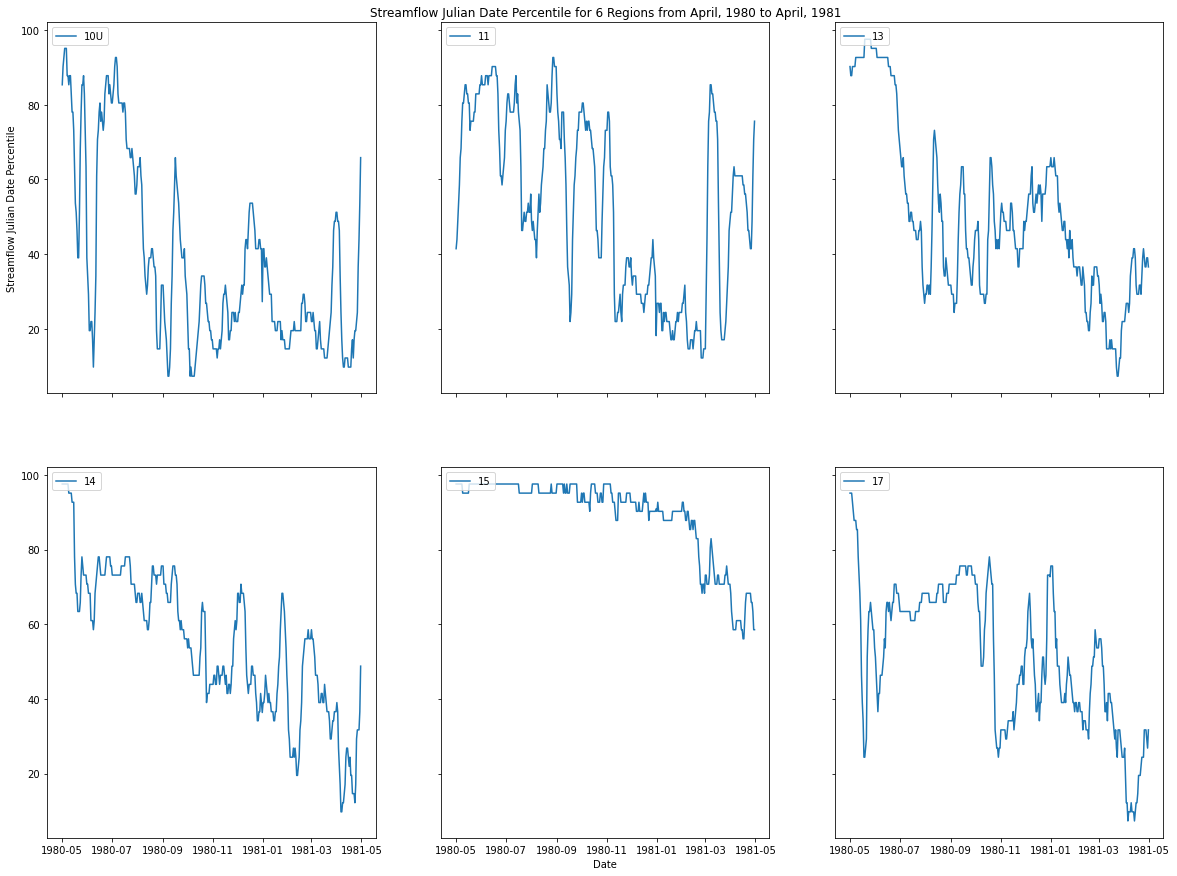

In [13]:
num_days = 365
fig, ((ax_10U, ax_11, ax_13), (ax_14, ax_15, ax_17)) = plt.subplots(
    figsize=(20,15), 
    nrows=2, 
    ncols=3, 
    sharex=True, 
    sharey=True
)
ax_10U.plot(df_10U.index[:num_days], df_10U["weibull_jd"][:num_days], label='10U')
ax_10U.legend(loc="upper left")
ax_10U.set_ylabel("Streamflow Julian Date Percentile")

ax_11.plot(df_11.index[:num_days], df_11["weibull_jd"][:num_days], label='11')
ax_11.legend(loc="upper left")
ax_11.set_title("Streamflow Julian Date Percentile for 6 Regions from April, 1980 to April, 1981")

ax_13.plot(df_13.index[:num_days], df_13["weibull_jd"][:num_days], label='13')
ax_13.legend(loc="upper left")

ax_14.plot(df_14.index[:num_days], df_14["weibull_jd"][:num_days], label='14')
ax_14.legend(loc="upper left")

ax_15.plot(df_15.index[:num_days], df_15["weibull_jd"][:num_days], label='15')
ax_15.legend(loc="upper left")
ax_15.set_xlabel("Date")

ax_17.plot(df_17.index[:num_days], df_17["weibull_jd"][:num_days], label='17')
ax_17.legend(loc="upper left")

### Gauge in Region 10U: Upper Missouri

In [14]:
df_10U.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13394 entries, 1980-05-01 to 2016-12-31
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   value         13394 non-null  float64
 1   jd            13394 non-null  int64  
 2   mean_value    13394 non-null  float64
 3   weibull_site  13394 non-null  float64
 4   weibull_jd    13394 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 627.8 KB


In [15]:
df_10U.describe()

value            jd    mean_value  weibull_site    weibull_jd
count  13394.000000  13394.000000  13394.000000  13394.000000  13394.000000
mean     276.859467    184.238764    276.900472     49.538555     48.247486
std      420.337917    105.227462    408.203662     29.036740     27.936762
min        9.000000      1.000000      9.971400      0.006844      2.439024
25%       30.000000     94.000000     30.150025     23.978509     24.390244
50%       79.200000    185.000000     80.000000     49.620149     48.780488
75%      351.000000    275.000000    358.285700     74.861406     73.170732
max     3900.000000    366.000000   2975.714300     99.931558     97.560976

In [16]:
df_10U.head(5)

value   jd  mean_value  weibull_site  weibull_jd
dt                                                          
1980-05-01  514.0  122    257.8571     68.824858   85.365854
1980-05-02  465.0  123    304.1429     71.535145   90.243902
1980-05-03  437.0  124    343.1429     74.046951   92.682927
1980-05-04  487.0  125    388.7143     76.353432   95.121951
1980-05-05  508.0  126    435.0000     78.078160   95.121951

Text(0.5, 1.0, 'Streamflow Julian Date Percentile from 1980-2020: Upper Missouri')

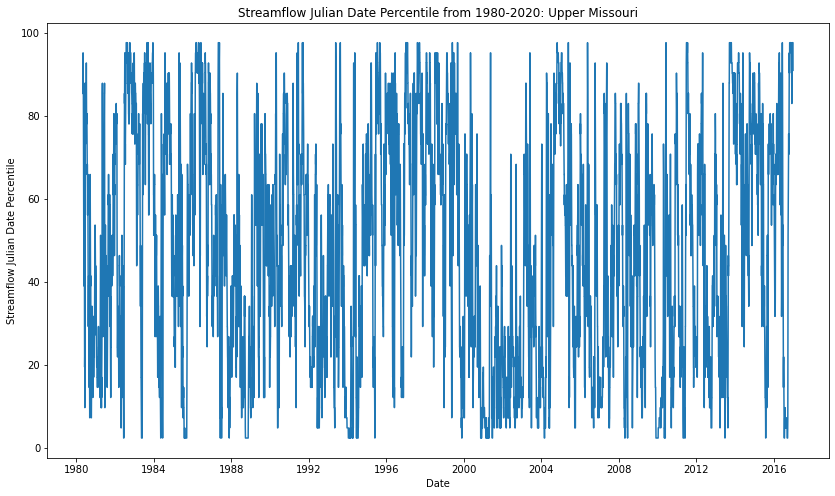

In [17]:
plt.figure(figsize=(14,8))
plt.plot(df_10U.index, df_10U["weibull_jd"])
plt.xlabel("Date")
plt.ylabel("Streamflow Julian Date Percentile")
plt.title("Streamflow Julian Date Percentile from 1980-2020: Upper Missouri")

### Autocorrelation/Partial Autocorrelation

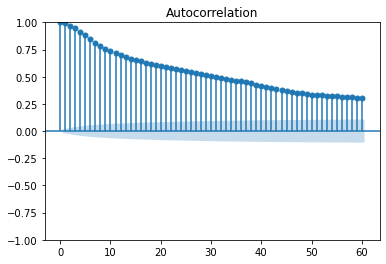

In [18]:
acf_10U_60 = plot_acf(df_10U["weibull_jd"], lags=60)  # 2 months
plt.show()

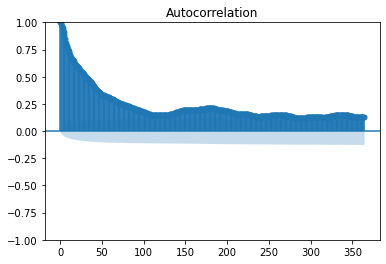

In [19]:
acf_10U_364 = plot_acf(df_10U["weibull_jd"], lags=364)  # 1 year
plt.show()

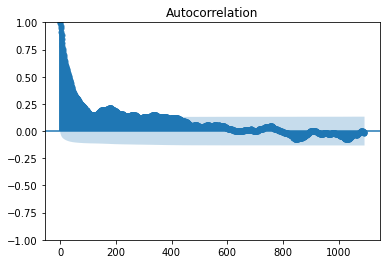

In [20]:
acf_10U_1093 = plot_acf(df_10U["weibull_jd"], lags=1093)  # 3 years
plt.show()

/Users/matthewthompson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


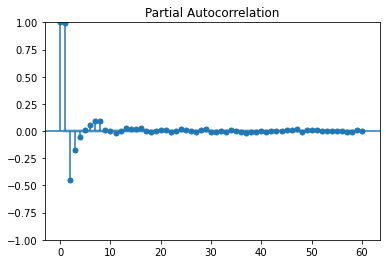

In [21]:
pacf_10U_60 = plot_pacf(df_10U["weibull_jd"], lags=60)  # 2 months
plt.show()

/Users/matthewthompson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


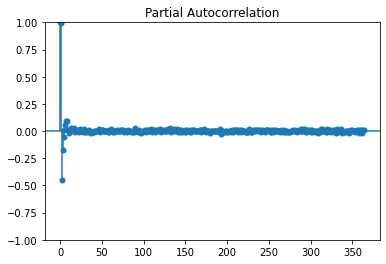

In [22]:
pacf_10U_364 = plot_pacf(df_10U["weibull_jd"], lags=364)  # 1 year
plt.show()

### Checking if Data is Stationary

In [23]:
adf = adfuller(df_10U["weibull_jd"])
print("Augmented Dickey-Fuller Test Statistic: %f" % adf[0])
print("p-value: %f" % adf[1])

print("critical values at different levels:")
for k, v in adf[4].items():
    print("\t%s: %.3f" % (k, v))

Augmented Dickey-Fuller Test Statistic: -10.894903
p-value: 0.000000
critical values at different levels:
	1%: -3.431
	5%: -2.862
	10%: -2.567


P-value rounds to 0.00 because it is so small. Our data is stationary.

### Decomposition: Period = 7-days; Variable = "weibull_jd"

A period of 30-days explores the weekly seasonality of our daily data.

In [24]:
decomp_10U_7 = STL(df_10U["weibull_jd"], period=7).fit()

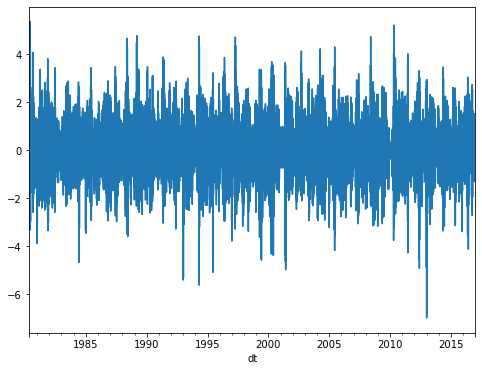

In [25]:
plt.figure(figsize=(8,6))
decomp_10U_7.seasonal.plot()
plt.show()

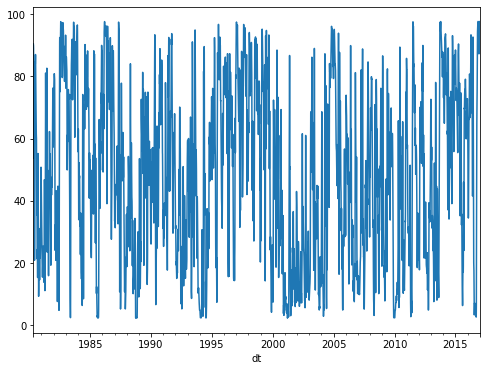

In [26]:
plt.figure(figsize=(8,6))
decomp_10U_7.trend.plot()
plt.show()

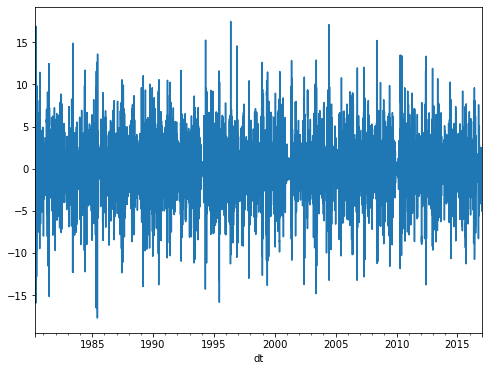

In [27]:
plt.figure(figsize=(8,6))
decomp_10U_7.resid.plot()
plt.show()

### Decomposition: Period = 30-days; Variable = "weibull_jd"

A period of 30-days explores the monthly seasonality of our daily data.

In [28]:
decomp_10U_30 = STL(df_10U["weibull_jd"], period=30).fit()

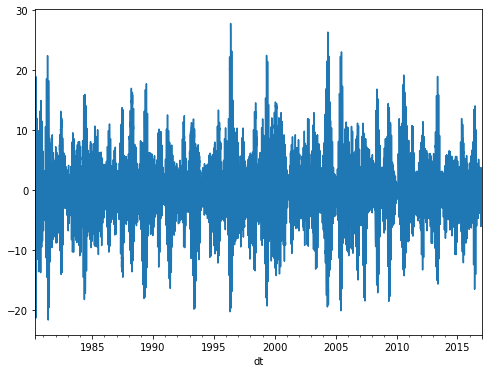

In [29]:
plt.figure(figsize=(8,6))
decomp_10U_30.seasonal.plot()
plt.show()

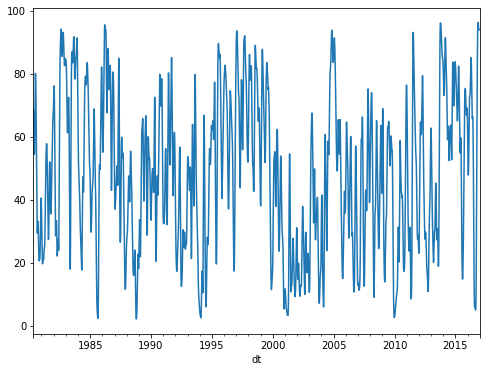

In [30]:
plt.figure(figsize=(8,6))
decomp_10U_30.trend.plot()
plt.show()

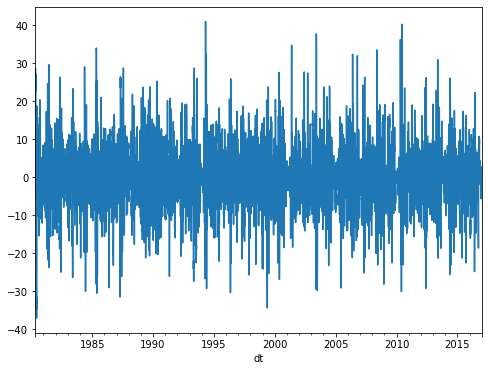

In [31]:
plt.figure(figsize=(8,6))
decomp_10U_30.resid.plot()
plt.show()

### Decomposition: Period = 364-days; Variable = "weibull_jd"

A period of 364-days explores the yearly seasonality of our daily data.

In [32]:
decomp_10U_364 = STL(df_10U["weibull_jd"], period=364).fit()

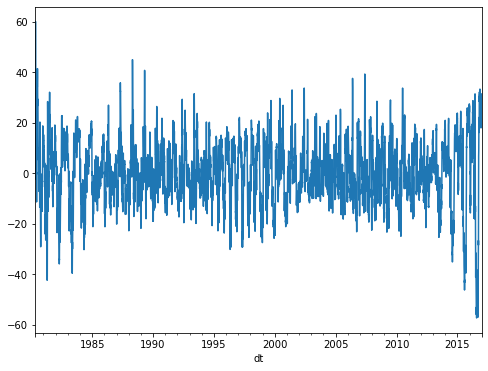

In [33]:
plt.figure(figsize=(8,6))
decomp_10U_364.seasonal.plot()
plt.show()

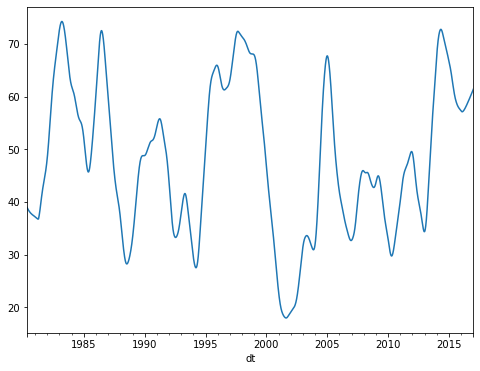

In [34]:
plt.figure(figsize=(8,6))
decomp_10U_364.trend.plot()
plt.show()

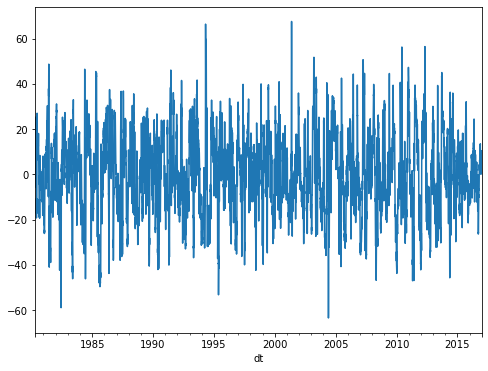

In [35]:
plt.figure(figsize=(8,6))
decomp_10U_364.resid.plot()
plt.show()

### Decomposition: Period = 1821-days; Variable = "weibull_jd"

A period of 1821-days explores the 5-yearly seasonality of our daily data.

In [36]:
decomp_10U_1821 = STL(df_10U["weibull_jd"], period=1821).fit()

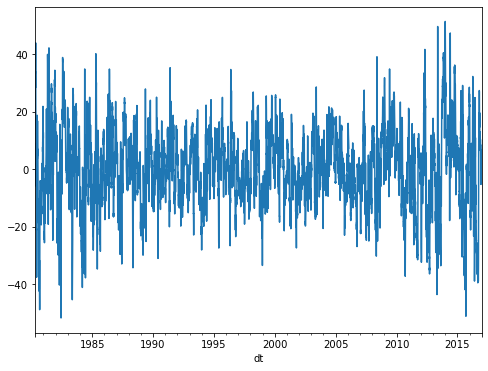

In [37]:
plt.figure(figsize=(8,6))
decomp_10U_1821.seasonal.plot()
plt.show()

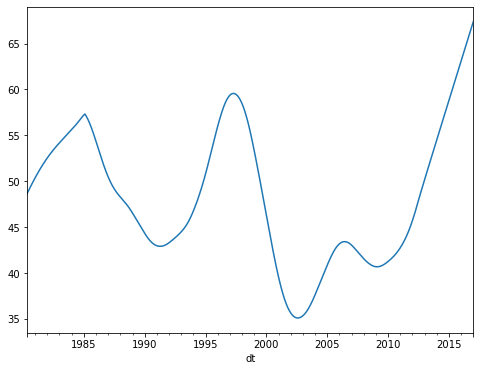

In [38]:
plt.figure(figsize=(8,6))
decomp_10U_1821.trend.plot()
plt.show()

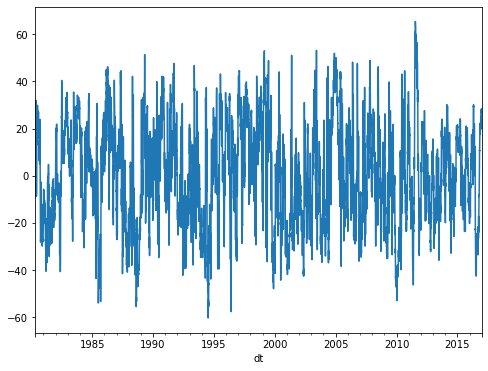

In [39]:
plt.figure(figsize=(8,6))
decomp_10U_1821.resid.plot()
plt.show()

### Decomposition: Period = 3642-days; Variable = "weibull_jd"

A period of 3642-days explores the 10-yearly seasonality of our daily data.

In [40]:
decomp_10U_3642 = STL(df_10U["weibull_jd"], period=3642).fit()

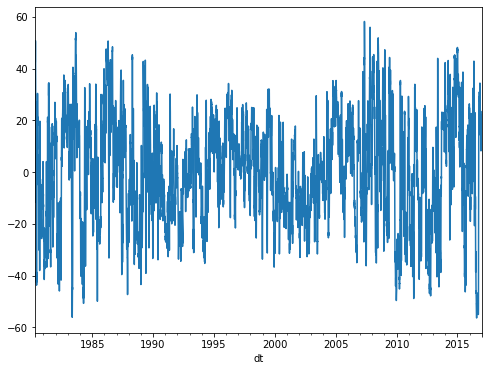

In [41]:
plt.figure(figsize=(8,6))
decomp_10U_3642.seasonal.plot()
plt.show()

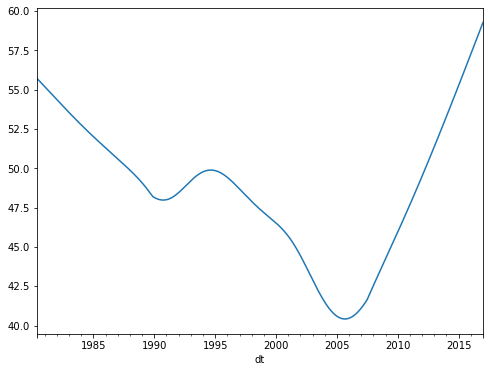

In [42]:
plt.figure(figsize=(8,6))
decomp_10U_3642.trend.plot()
plt.show()

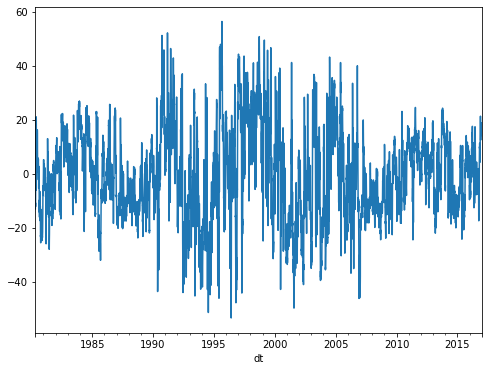

In [43]:
plt.figure(figsize=(8,6))
decomp_10U_3642.resid.plot()
plt.show()

### Gauge in Region 11: Arkansas-White-Red

There are unfortunately some strange missing values for this gauge, as outlined below:
- 2017 = 358 rows; should be 365; missing from 2017-10-03 to 2017-10-09
- 2018 = 188 rows; should be 365
- 2019 = 357 rows; should be 365
- 2020 = 76 rows; should be 91

In [44]:
df_11.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13394 entries, 1980-05-01 to 2016-12-31
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   value         13394 non-null  float64
 1   jd            13394 non-null  int64  
 2   mean_value    13394 non-null  float64
 3   weibull_site  13394 non-null  float64
 4   weibull_jd    13394 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 627.8 KB


In [45]:
df_11.describe()

value            jd    mean_value  weibull_site    weibull_jd
count  13394.000000  13394.000000  13394.000000  13394.000000  13394.000000
mean      25.189958    184.238764     25.197794     49.313083     48.652109
std       33.788205    105.227462     32.932276     28.785382     27.786047
min        0.080000      1.000000      0.237100      0.006844      2.439024
25%        5.600000     94.000000      5.816050     24.101704     24.390244
50%       15.000000    185.000000     15.852100     49.637260     48.780488
75%       34.200000    275.000000     34.428600     74.368626     73.170732
max      450.000000    366.000000    407.000000     98.535350     97.560976

In [46]:
df_11.head(5)

value   jd  mean_value  weibull_site  weibull_jd
dt                                                          
1980-05-01   53.0  122     39.8571     79.926083   41.463415
1980-05-02   54.0  123     42.8571     82.533707   43.902439
1980-05-03   54.0  124     46.2857     85.319280   48.780488
1980-05-04   58.0  125     50.4286     87.659982   53.658537
1980-05-05   70.0  126     55.5714     89.925399   58.536585

Text(0.5, 1.0, 'Streamflow Julian Date Percentile from 1980-2020: Arkansas-White-Red')

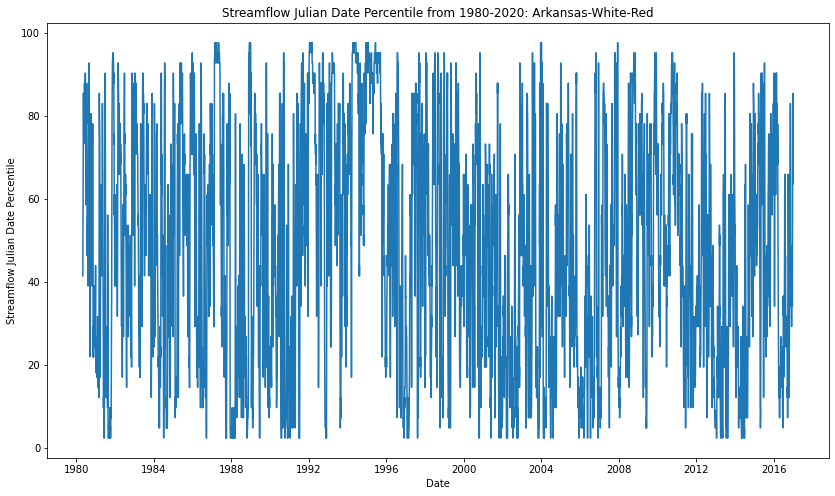

In [47]:
plt.figure(figsize=(14,8))
plt.plot(df_11.index, df_11["weibull_jd"])
plt.xlabel("Date")
plt.ylabel("Streamflow Julian Date Percentile")
plt.title("Streamflow Julian Date Percentile from 1980-2020: Arkansas-White-Red")

### Autocorrelation/Partial Autocorrelation

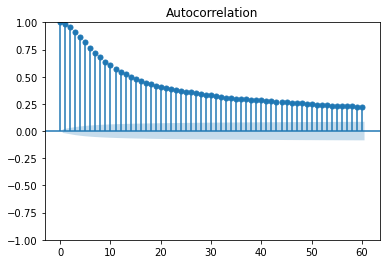

In [48]:
acf_11_60 = plot_acf(df_11["weibull_jd"], lags=60)  # 2 months
plt.show()

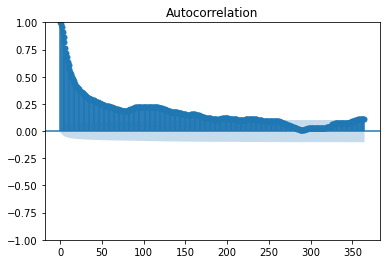

In [49]:
acf_11_364 = plot_acf(df_11["weibull_jd"], lags=364)  # 1 year
plt.show()

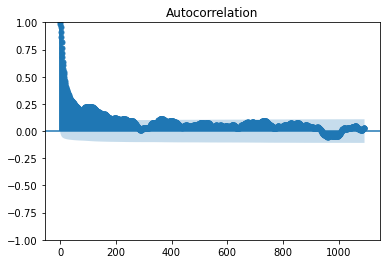

In [50]:
acf_11_1093 = plot_acf(df_11["weibull_jd"], lags=1093)  # 3 years
plt.show()

/Users/matthewthompson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


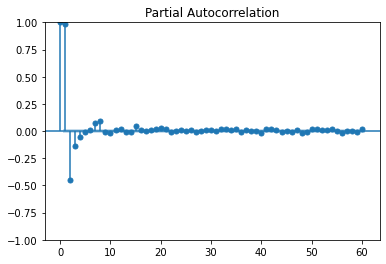

In [51]:
pacf_11_60 = plot_pacf(df_11["weibull_jd"], lags=60)  # 2 months
plt.show()

/Users/matthewthompson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


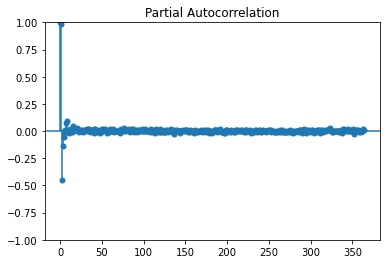

In [52]:
acf_11_364 = plot_pacf(df_11["weibull_jd"], lags=364)  # 1 year
plt.show()

### Checking if Data is Stationary

In [53]:
adf = adfuller(df_11["weibull_jd"])
print("Augmented Dickey-Fuller Test Statistic: %f" % adf[0])
print("p-value: %f" % adf[1])

print("critical values at different levels:")
for k, v in adf[4].items():
    print("\t%s: %.3f" % (k, v))

Augmented Dickey-Fuller Test Statistic: -12.959448
p-value: 0.000000
critical values at different levels:
	1%: -3.431
	5%: -2.862
	10%: -2.567


P-value rounds to 0.00 because it is so small. Our data is stationary.

### Decomposition: Period = 7-days; Variable = "weibull_jd"

A period of 30-days explores the weekly seasonality of our daily data.

In [54]:
decomp_11_7 = STL(df_11["weibull_jd"], period=7).fit()

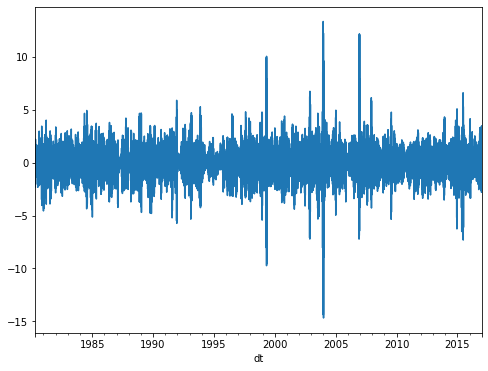

In [55]:
plt.figure(figsize=(8,6))
decomp_11_7.seasonal.plot()
plt.show()

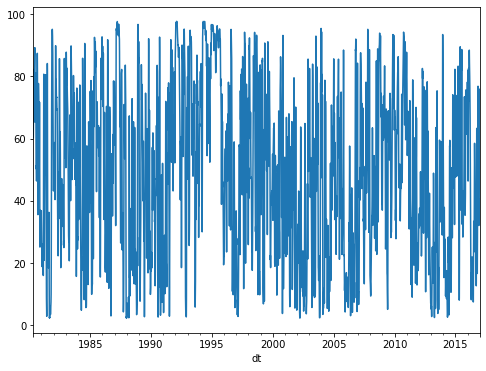

In [56]:
plt.figure(figsize=(8,6))
decomp_11_7.trend.plot()
plt.show()

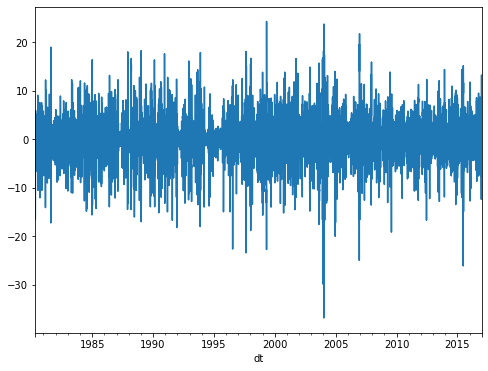

In [57]:
plt.figure(figsize=(8,6))
decomp_11_7.resid.plot()
plt.show()

### Decomposition: Period = 30-days; Variable = "weibull_jd"

A period of 30-days explores the monthly seasonality of our daily data.

In [58]:
decomp_11_30 = STL(df_11["weibull_jd"], period=30).fit()

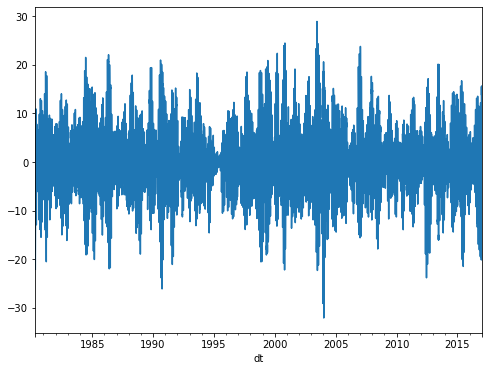

In [59]:
plt.figure(figsize=(8,6))
decomp_11_30.seasonal.plot()
plt.show()

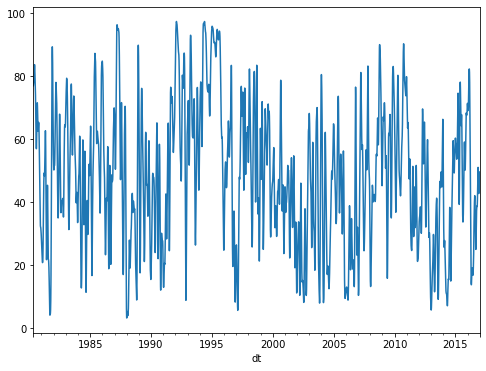

In [60]:
plt.figure(figsize=(8,6))
decomp_11_30.trend.plot()
plt.show()

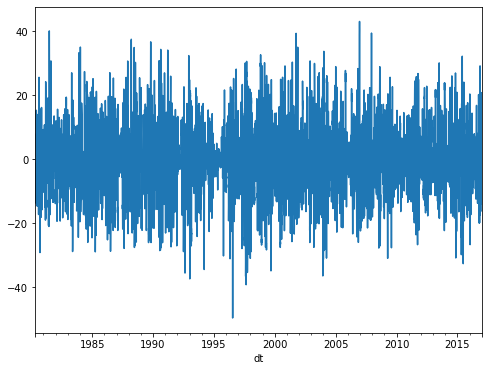

In [61]:
plt.figure(figsize=(8,6))
decomp_11_30.resid.plot()
plt.show()

### Decomposition: Period = 364-days; Variable = "weibull_jd"

A period of 364-days explores the yearly seasonality of our daily data.

In [62]:
decomp_11_364 = STL(df_11["weibull_jd"], period=364).fit()

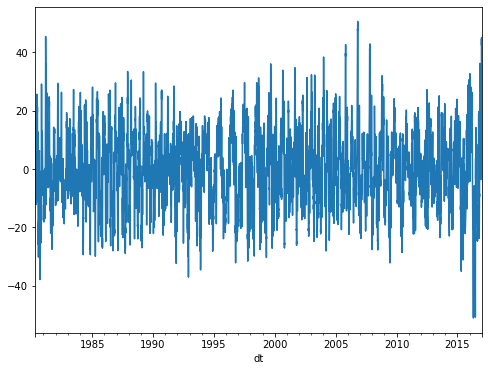

In [63]:
plt.figure(figsize=(8,6))
decomp_11_364.seasonal.plot()
plt.show()

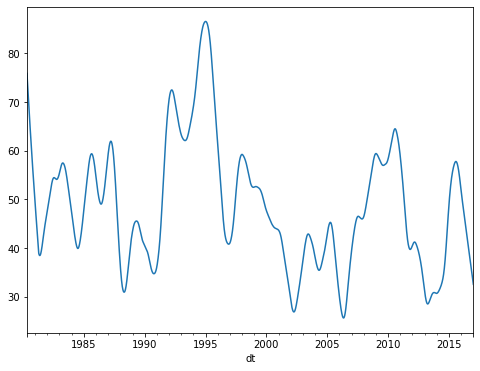

In [64]:
plt.figure(figsize=(8,6))
decomp_11_364.trend.plot()
plt.show()

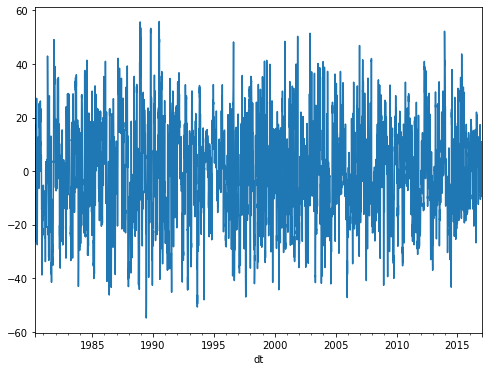

In [65]:
plt.figure(figsize=(8,6))
decomp_11_364.resid.plot()
plt.show()

### Decomposition: Period = 1821-days; Variable = "weibull_jd"

A period of 1821-days explores the 5-yearly seasonality of our daily data.

In [66]:
decomp_11_1821 = STL(df_11["weibull_jd"], period=1821).fit()

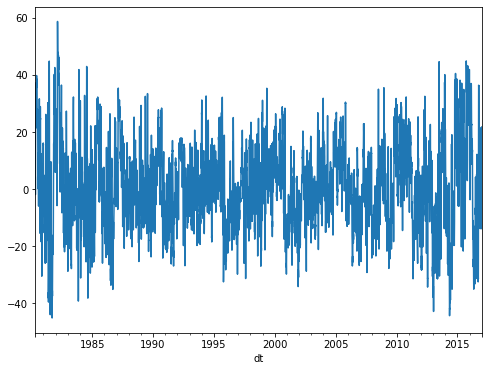

In [67]:
plt.figure(figsize=(8,6))
decomp_11_1821.seasonal.plot()
plt.show()

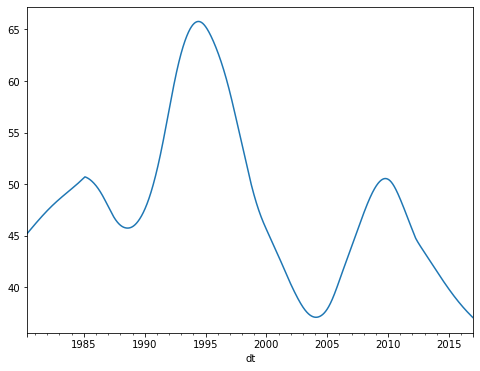

In [68]:
plt.figure(figsize=(8,6))
decomp_11_1821.trend.plot()
plt.show()

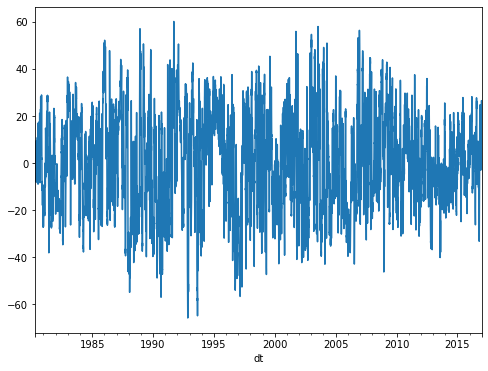

In [69]:
plt.figure(figsize=(8,6))
decomp_11_1821.resid.plot()
plt.show()

### Decomposition: Period = 3642-days; Variable = "weibull_jd"

A period of 3642-days explores the 10-yearly seasonality of our daily data.

In [70]:
decomp_11_3642 = STL(df_11["weibull_jd"], period=3642).fit()

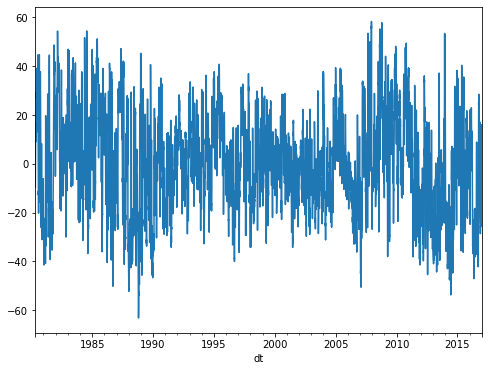

In [71]:
plt.figure(figsize=(8,6))
decomp_11_3642.seasonal.plot()
plt.show()

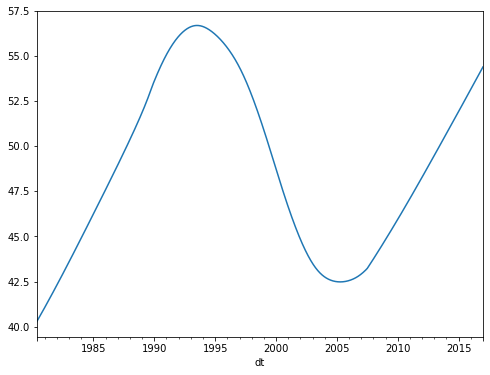

In [72]:
plt.figure(figsize=(8,6))
decomp_11_3642.trend.plot()
plt.show()

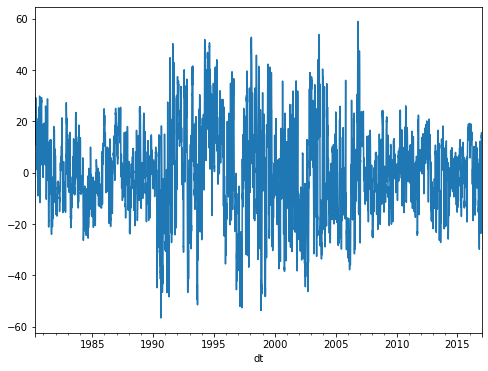

In [73]:
plt.figure(figsize=(8,6))
decomp_11_3642.resid.plot()
plt.show()

### Gauge in Region 13: Rio Grande

In [74]:
df_13.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13394 entries, 1980-05-01 to 2016-12-31
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   value         13394 non-null  float64
 1   jd            13394 non-null  int64  
 2   mean_value    13394 non-null  float64
 3   weibull_site  13394 non-null  float64
 4   weibull_jd    13394 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 627.8 KB


In [75]:
df_13.describe()

value            jd    mean_value  weibull_site    weibull_jd
count  13394.000000  13394.000000  13394.000000  13394.000000  13394.000000
mean      71.796893    184.238764     71.902774     51.311869     51.666928
std      114.676604    105.227462    111.217357     28.090388     27.486303
min        2.100000      1.000000      4.634300      0.006844      2.439024
25%       22.700000     94.000000     23.417875     27.949832     29.268293
50%       32.000000    185.000000     32.571400     51.646020     51.219512
75%       60.000000    275.000000     60.239325     75.275477     75.609756
max     1480.000000    366.000000   1205.714300     99.952091     97.560976

In [76]:
df_13.head(5)

value   jd  mean_value  weibull_site  weibull_jd
dt                                                          
1980-05-01  529.0  122    488.8571     98.658545   90.243902
1980-05-02  472.0  123    490.7143     98.692766   87.804878
1980-05-03  469.0  124    496.0000     98.720142   87.804878
1980-05-04  506.0  125    504.4286     98.788584   90.243902
1980-05-05  521.0  126    510.8571     98.822805   90.243902

Text(0.5, 1.0, 'Streamflow Julian Date Percentile from 1980-2020: Rio Grande')

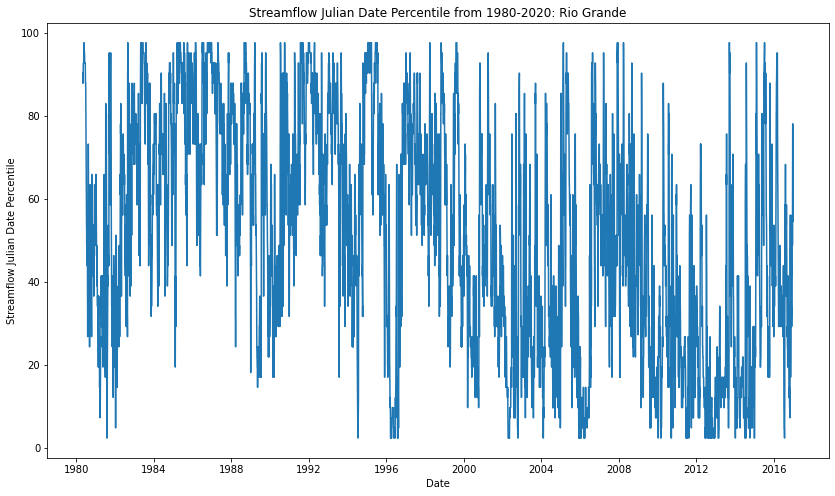

In [77]:
plt.figure(figsize=(14,8))
plt.plot(df_13.index, df_13["weibull_jd"])
plt.xlabel("Date")
plt.ylabel("Streamflow Julian Date Percentile")
plt.title("Streamflow Julian Date Percentile from 1980-2020: Rio Grande")

### Autocorrelation/Partial Autocorrelation

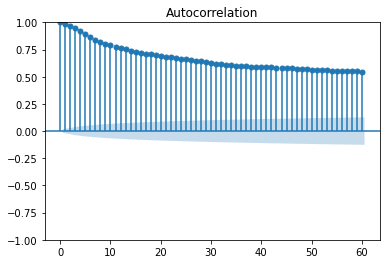

In [78]:
acf_13_60 = plot_acf(df_13["weibull_jd"], lags=60)  # 2 months
plt.show()

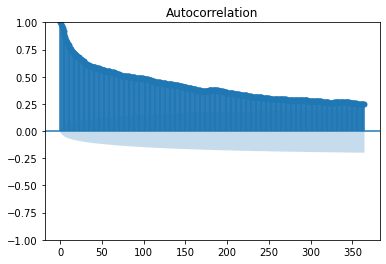

In [79]:
acf_13_364 = plot_acf(df_13["weibull_jd"], lags=364)  # 1 year
plt.show()

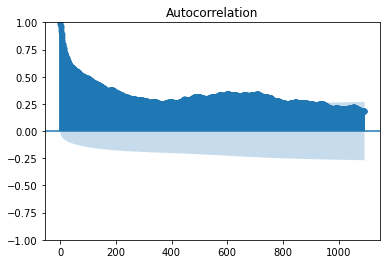

In [80]:
acf_13_1093 = plot_acf(df_13["weibull_jd"], lags=1093)  # 3 years
plt.show()

/Users/matthewthompson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


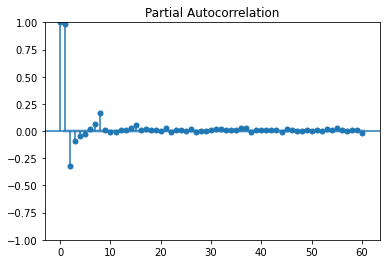

In [81]:
pacf_13_60 = plot_pacf(df_13["weibull_jd"], lags=60)  # 2 months
plt.show()

/Users/matthewthompson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


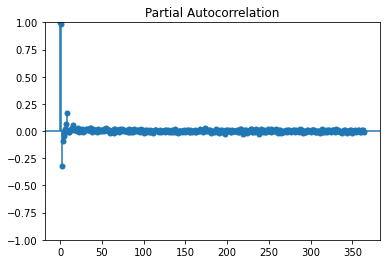

In [82]:
pacf_13_364 = plot_pacf(df_13["weibull_jd"], lags=364)  # 1 year
plt.show()

### Checking if Data is Stationary

In [83]:
adf = adfuller(df_13["weibull_jd"])
print("Augmented Dickey-Fuller Test Statistic: %f" % adf[0])
print("p-value: %f" % adf[1])

print("critical values at different levels:")
for k, v in adf[4].items():
    print("\t%s: %.3f" % (k, v))

Augmented Dickey-Fuller Test Statistic: -7.223692
p-value: 0.000000
critical values at different levels:
	1%: -3.431
	5%: -2.862
	10%: -2.567


P-value rounds to 0.00 because it is so small. Our data is stationary.

### Decomposition: Period = 7-days; Variable = "weibull_jd"

A period of 30-days explores the weekly seasonality of our daily data.

In [84]:
decomp_13_7 = STL(df_13["weibull_jd"], period=7).fit()

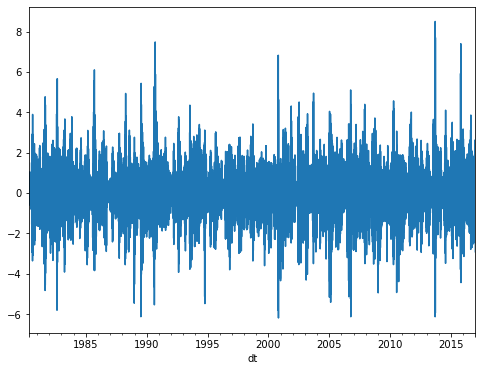

In [85]:
plt.figure(figsize=(8,6))
decomp_13_7.seasonal.plot()
plt.show()

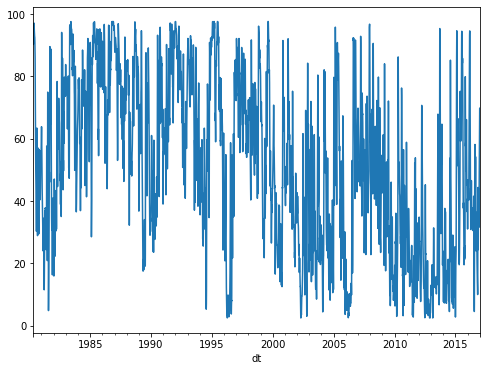

In [86]:
plt.figure(figsize=(8,6))
decomp_13_7.trend.plot()
plt.show()

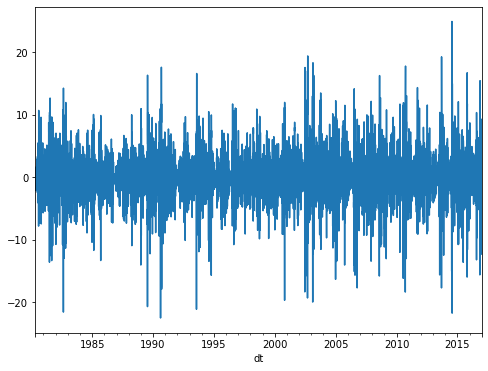

In [87]:
plt.figure(figsize=(8,6))
decomp_13_7.resid.plot()
plt.show()

### Decomposition: Period = 30-days; Variable = "weibull_jd"

A period of 30-days explores the monthly seasonality of our daily data.

In [88]:
decomp_13_30 = STL(df_13["weibull_jd"], period=30).fit()

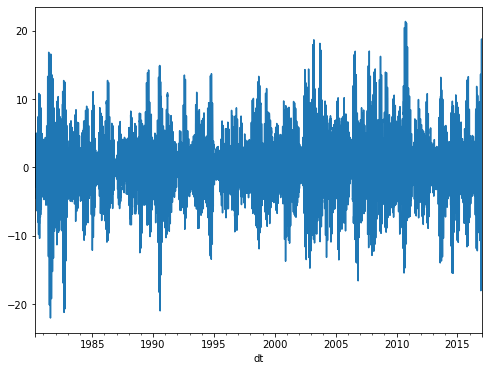

In [89]:
plt.figure(figsize=(8,6))
decomp_13_30.seasonal.plot()
plt.show()

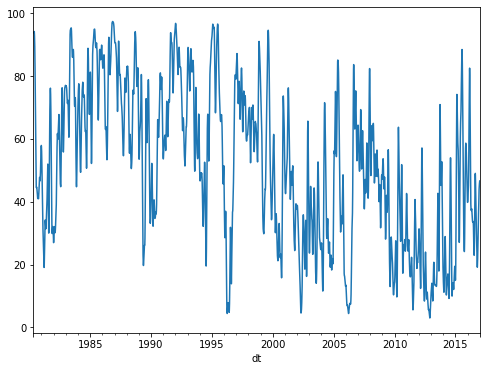

In [90]:
plt.figure(figsize=(8,6))
decomp_13_30.trend.plot()
plt.show()

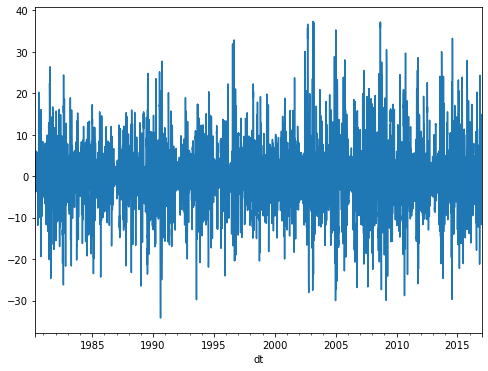

In [91]:
plt.figure(figsize=(8,6))
decomp_13_30.resid.plot()
plt.show()

### Decomposition: Period = 364-days; Variable = "weibull_jd"

A period of 364-days explores the yearly seasonality of our daily data.

In [92]:
decomp_13_364 = STL(df_13["weibull_jd"], period=364).fit()

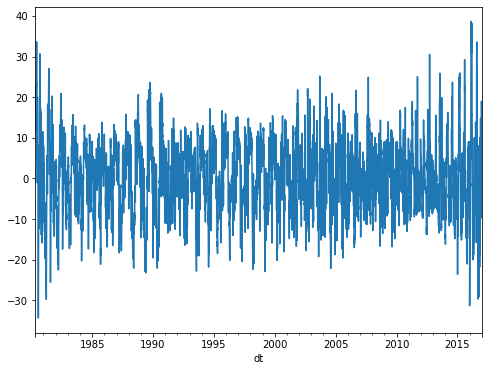

In [93]:
plt.figure(figsize=(8,6))
decomp_13_364.seasonal.plot()
plt.show()

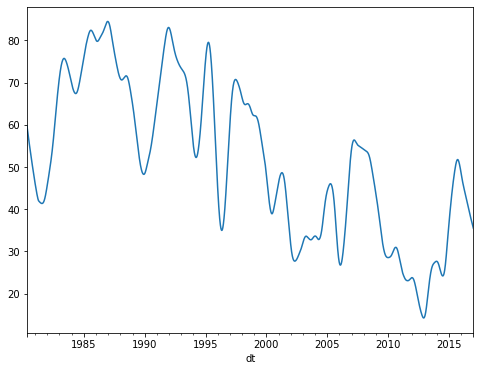

In [94]:
plt.figure(figsize=(8,6))
decomp_13_364.trend.plot()
plt.show()

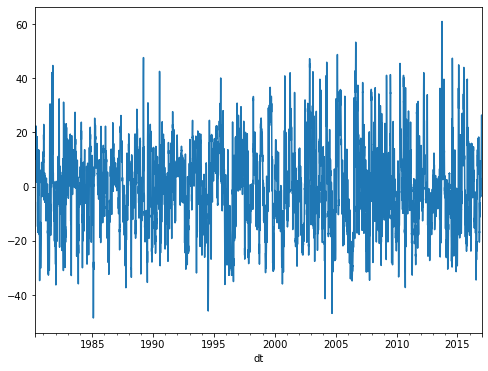

In [95]:
plt.figure(figsize=(8,6))
decomp_13_364.resid.plot()
plt.show()

### Decomposition: Period = 1821-days; Variable = "weibull_jd"

A period of 1821-days explores the 5-yearly seasonality of our daily data.

In [96]:
decomp_13_1821 = STL(df_13["weibull_jd"], period=1821).fit()

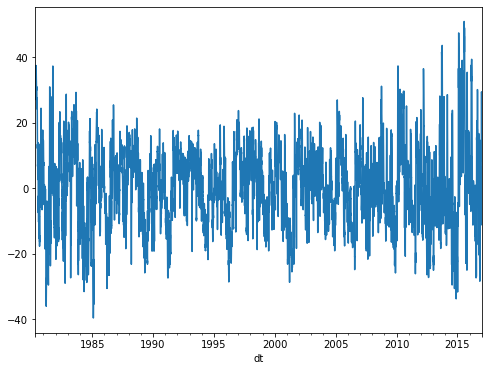

In [97]:
plt.figure(figsize=(8,6))
decomp_13_1821.seasonal.plot()
plt.show()

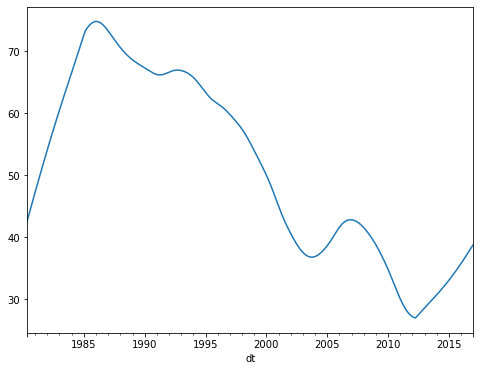

In [98]:
plt.figure(figsize=(8,6))
decomp_13_1821.trend.plot()
plt.show()

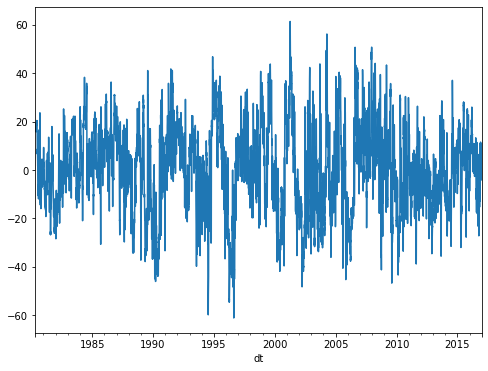

In [99]:
plt.figure(figsize=(8,6))
decomp_13_1821.resid.plot()
plt.show()

### Decomposition: Period = 3642-days; Variable = "weibull_jd"

A period of 3642-days explores the 10-yearly seasonality of our daily data.

In [100]:
decomp_13_3642 = STL(df_13["weibull_jd"], period=3642).fit()

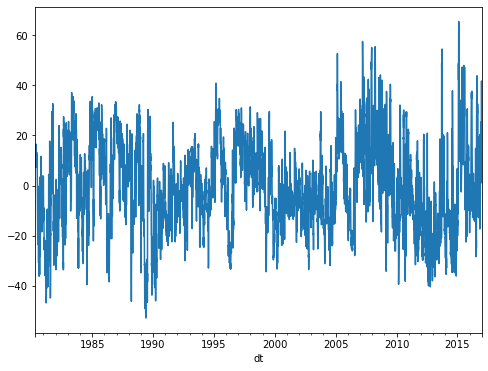

In [101]:
plt.figure(figsize=(8,6))
decomp_13_3642.seasonal.plot()
plt.show()

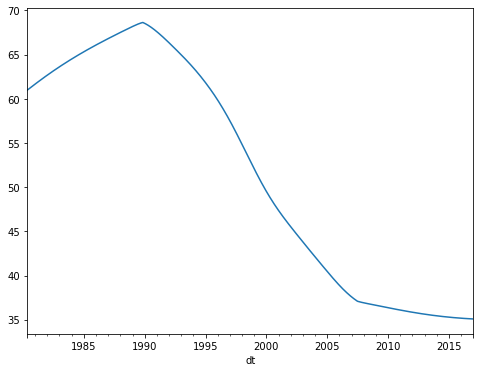

In [102]:
plt.figure(figsize=(8,6))
decomp_13_3642.trend.plot()
plt.show()

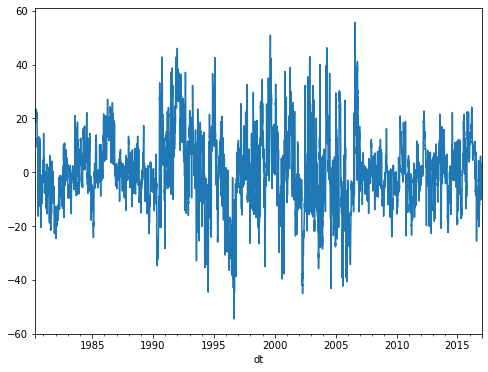

In [103]:
plt.figure(figsize=(8,6))
decomp_13_3642.resid.plot()
plt.show()

### Gauge in Region 14: Upper Colorado

In [104]:
df_14.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13394 entries, 1980-05-01 to 2016-12-31
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   value         13394 non-null  float64
 1   jd            13394 non-null  int64  
 2   mean_value    13394 non-null  float64
 3   weibull_site  13394 non-null  float64
 4   weibull_jd    13394 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 627.8 KB


In [105]:
df_14.describe()

value            jd    mean_value  weibull_site    weibull_jd
count  13394.000000  13394.000000  13394.000000  13394.000000  13394.000000
mean      90.564097    184.238764     90.660845     49.521764     49.096975
std      176.061894    105.227462    173.296679     28.939625     28.048431
min        0.920000      1.000000      2.162900      0.006844      2.439024
25%       15.000000     94.000000     15.117875     24.498665     24.390244
50%       23.000000    185.000000     22.571400     48.819383     48.780488
75%       66.075000    275.000000     68.142900     74.840873     73.170732
max     2000.000000    366.000000   1852.857100     99.952091     97.560976

In [106]:
df_14.head(5)

value   jd  mean_value  weibull_site  weibull_jd
dt                                                          
1980-05-01  671.0  122    473.8571     95.496544   97.560976
1980-05-02  667.0  123    512.0000     96.085141   97.560976
1980-05-03  615.0  124    535.5714     96.386284   97.560976
1980-05-04  674.0  125    571.8571     96.810622   97.560976
1980-05-05  816.0  126    629.1429     97.406064   97.560976

Text(0.5, 1.0, 'Streamflow Julian Date Percentile from 1980-2020: Upper Colorado')

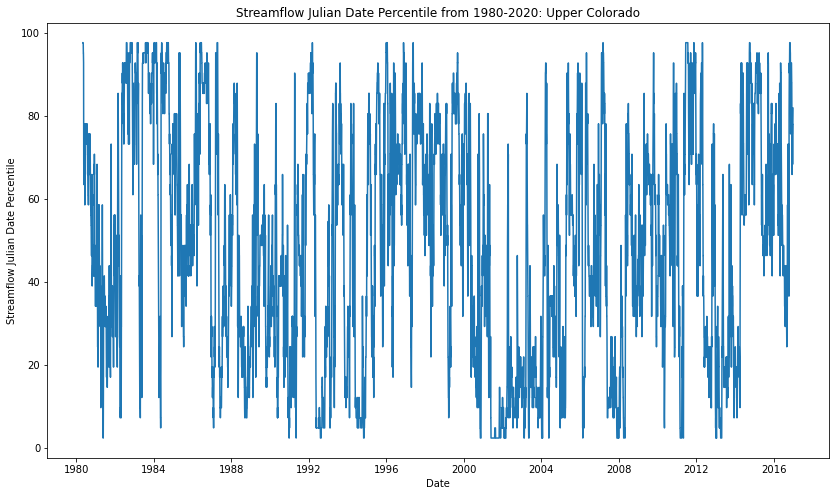

In [107]:
plt.figure(figsize=(14,8))
plt.plot(df_14.index, df_14["weibull_jd"])
plt.xlabel("Date")
plt.ylabel("Streamflow Julian Date Percentile")
plt.title("Streamflow Julian Date Percentile from 1980-2020: Upper Colorado")

### Autocorrelation/Partial Autocorrelation

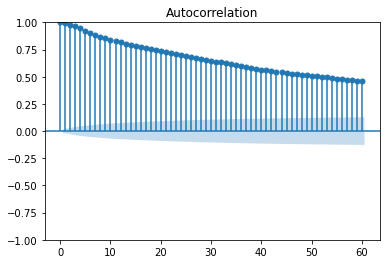

In [108]:
acf_14_60 = plot_acf(df_14["weibull_jd"], lags=60)  # 2 months
plt.show()

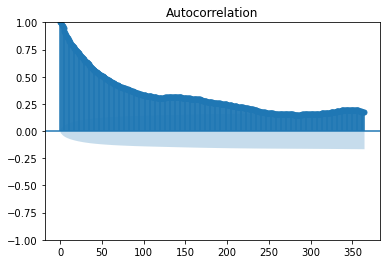

In [109]:
acf_14_364 = plot_acf(df_14["weibull_jd"], lags=364)  # 1 year
plt.show()

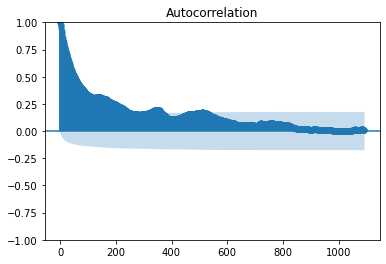

In [110]:
acf_14_1093 = plot_acf(df_14["weibull_jd"], lags=1093)  # 3 years
plt.show()

/Users/matthewthompson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


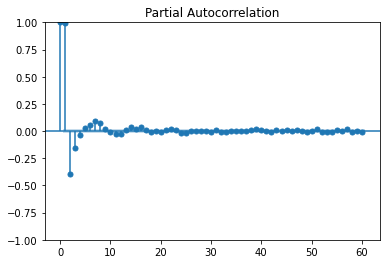

In [111]:
pacf_14_60 = plot_pacf(df_14["weibull_jd"], lags=60)  # 2 months
plt.show()

/Users/matthewthompson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


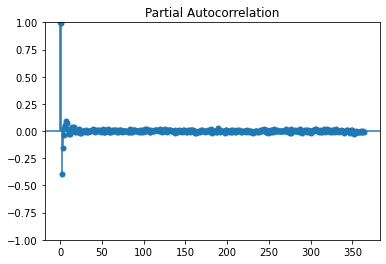

In [112]:
pacf_14_364 = plot_pacf(df_14["weibull_jd"], lags=364)  # 1 year
plt.show()

### Checking if Data is Stationary

In [113]:
adf = adfuller(df_14["weibull_jd"])
print("Augmented Dickey-Fuller Test Statistic: %f" % adf[0])
print("p-value: %f" % adf[1])

print("critical values at different levels:")
for k, v in adf[4].items():
    print("\t%s: %.3f" % (k, v))

Augmented Dickey-Fuller Test Statistic: -8.869999
p-value: 0.000000
critical values at different levels:
	1%: -3.431
	5%: -2.862
	10%: -2.567


P-value rounds to 0.00 because it is so small. Our data is stationary.

### Decomposition: Period = 7-days; Variable = "weibull_jd"

A period of 30-days explores the weekly seasonality of our daily data.

In [114]:
decomp_14_7 = STL(df_14["weibull_jd"], period=7).fit()

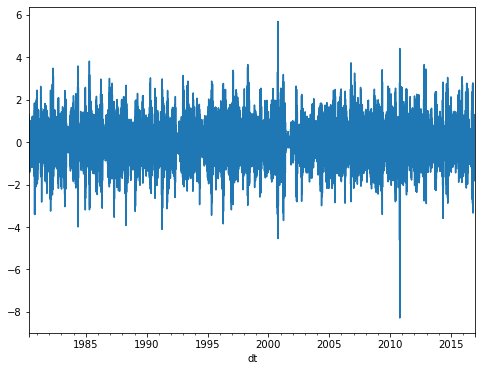

In [115]:
plt.figure(figsize=(8,6))
decomp_14_7.seasonal.plot()
plt.show()

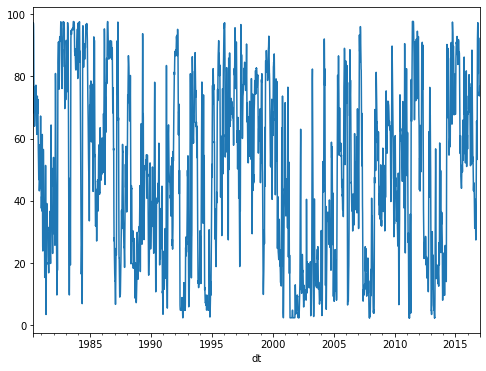

In [116]:
plt.figure(figsize=(8,6))
decomp_14_7.trend.plot()
plt.show()

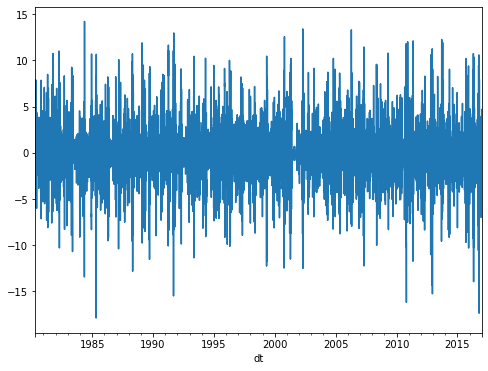

In [117]:
plt.figure(figsize=(8,6))
decomp_14_7.resid.plot()
plt.show()

### Decomposition: Period = 30-days; Variable = "weibull_jd"

A period of 30-days explores the monthly seasonality of our daily data.

In [118]:
decomp_14_30 = STL(df_14["weibull_jd"], period=30).fit()

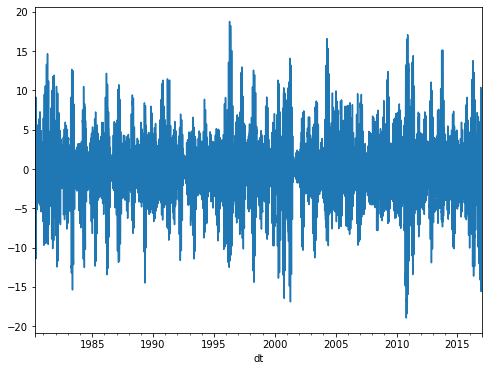

In [119]:
plt.figure(figsize=(8,6))
decomp_14_30.seasonal.plot()
plt.show()

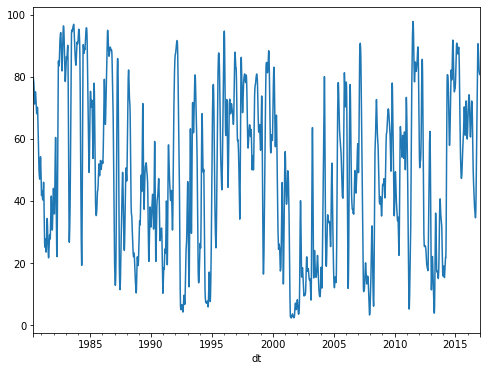

In [120]:
plt.figure(figsize=(8,6))
decomp_14_30.trend.plot()
plt.show()

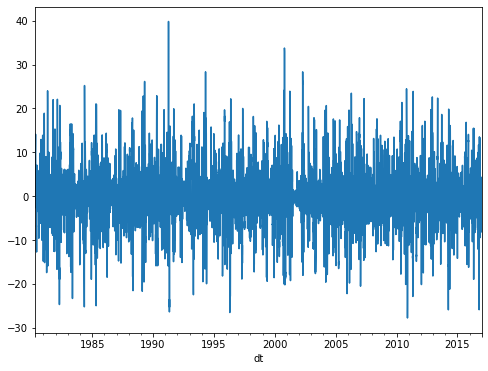

In [121]:
plt.figure(figsize=(8,6))
decomp_14_30.resid.plot()
plt.show()

### Decomposition: Period = 364-days; Variable = "weibull_jd"

A period of 364-days explores the yearly seasonality of our daily data.

In [122]:
decomp_14_364 = STL(df_14["weibull_jd"], period=364).fit()

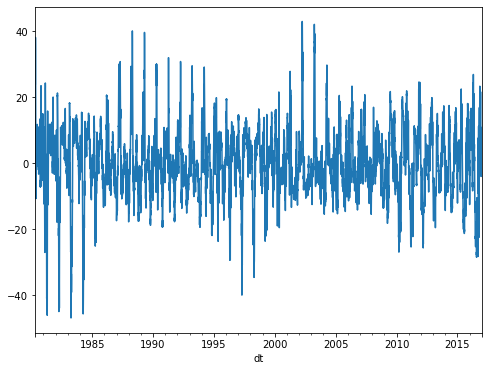

In [123]:
plt.figure(figsize=(8,6))
decomp_14_364.seasonal.plot()
plt.show()

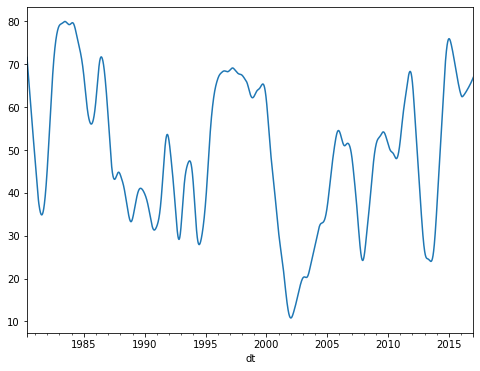

In [124]:
plt.figure(figsize=(8,6))
decomp_14_364.trend.plot()
plt.show()

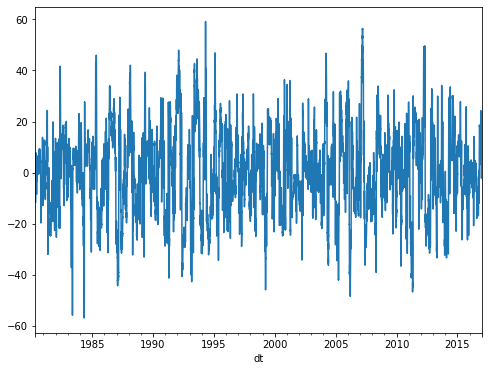

In [125]:
plt.figure(figsize=(8,6))
decomp_14_364.resid.plot()
plt.show()

### Decomposition: Period = 1821-days; Variable = "weibull_jd"

A period of 1821-days explores the 5-yearly seasonality of our daily data.

In [126]:
decomp_14_1821 = STL(df_14["weibull_jd"], period=1821).fit()

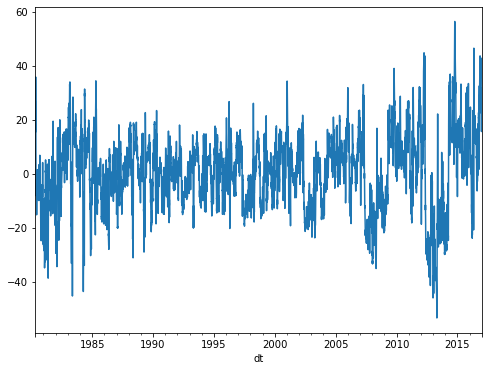

In [127]:
plt.figure(figsize=(8,6))
decomp_14_1821.seasonal.plot()
plt.show()

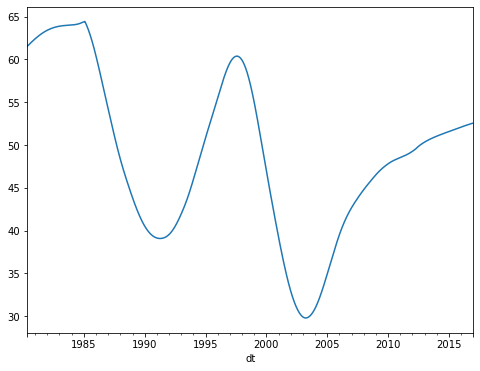

In [128]:
plt.figure(figsize=(8,6))
decomp_14_1821.trend.plot()
plt.show()

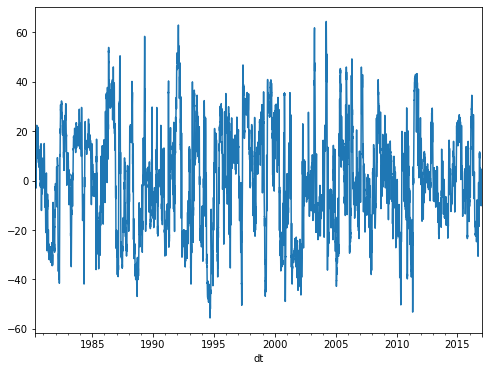

In [129]:
plt.figure(figsize=(8,6))
decomp_14_1821.resid.plot()
plt.show()

### Decomposition: Period = 3642-days; Variable = "weibull_jd"

A period of 3642-days explores the 10-yearly seasonality of our daily data.

In [130]:
decomp_14_3642 = STL(df_14["weibull_jd"], period=3642).fit()

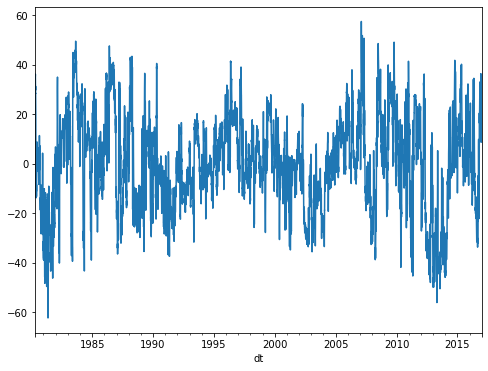

In [131]:
plt.figure(figsize=(8,6))
decomp_14_3642.seasonal.plot()
plt.show()

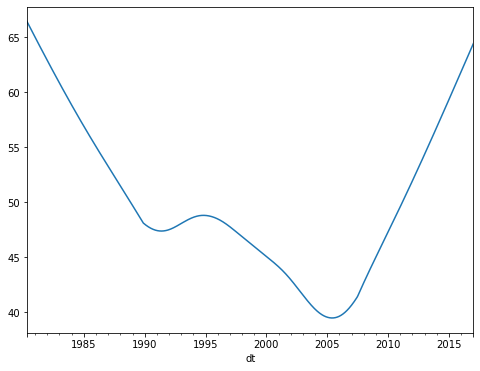

In [132]:
plt.figure(figsize=(8,6))
decomp_14_3642.trend.plot()
plt.show()

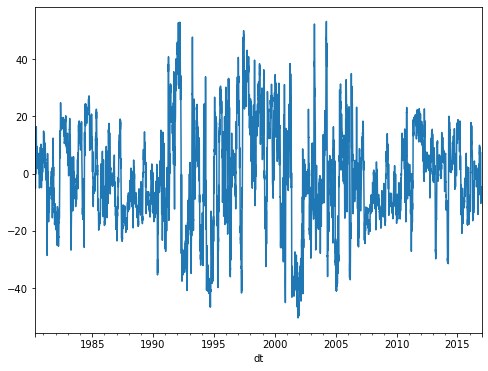

In [133]:
plt.figure(figsize=(8,6))
decomp_14_3642.resid.plot()
plt.show()

### Gauge in Region 15: Lower Colorado

There are unfortunately some strange missing values for this gauge, as outlined below:
- 2017 = 358 rows; should be 365; missing 2017-01-13 to 2017-01-19

In [134]:
df_15.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13394 entries, 1980-05-01 to 2016-12-31
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   value         13394 non-null  float64
 1   jd            13394 non-null  int64  
 2   mean_value    13394 non-null  float64
 3   weibull_site  13394 non-null  float64
 4   weibull_jd    13394 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 627.8 KB


In [135]:
df_15.describe()

value            jd    mean_value  weibull_site    weibull_jd
count  13394.000000  13394.000000  13394.000000  13394.000000  13394.000000
mean      15.926875    184.238764     15.970587     49.208864     49.062740
std       18.464849    105.227462     17.483980     28.789381     28.291005
min        2.400000      1.000000      3.051400      0.006844      2.439024
25%        8.010000     94.000000      8.277100     24.194100     24.390244
50%       12.000000    185.000000     12.300000     49.113681     48.780488
75%       18.000000    275.000000     18.000000     74.122237     73.170732
max      624.000000    366.000000    224.071400     99.876805     97.560976

In [136]:
df_15.head(5)

value   jd  mean_value  weibull_site  weibull_jd
dt                                                          
1980-05-01  201.0  122    205.5714     99.822052   97.560976
1980-05-02  201.0  123    207.1429     99.835740   97.560976
1980-05-03  195.0  124    206.0000     99.828896   97.560976
1980-05-04  187.0  125    203.4286     99.794675   97.560976
1980-05-05  191.0  126    202.1429     99.787831   97.560976

Text(0.5, 1.0, 'Streamflow Julian Date Percentile from 1980-2020: Lower Colorado')

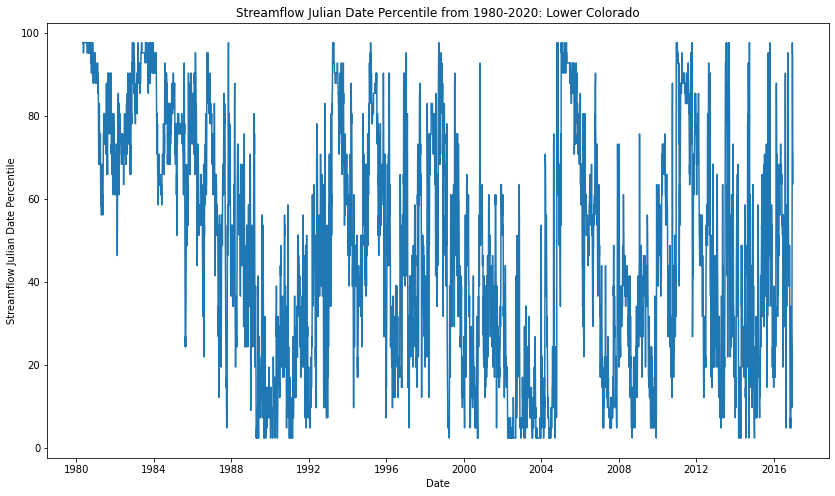

In [137]:
plt.figure(figsize=(14,8))
plt.plot(df_15.index, df_15["weibull_jd"])
plt.xlabel("Date")
plt.ylabel("Streamflow Julian Date Percentile")
plt.title("Streamflow Julian Date Percentile from 1980-2020: Lower Colorado")

### Autocorrelation/Partial Autocorrelation

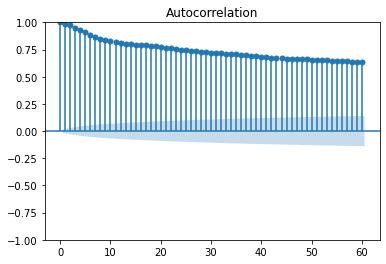

In [138]:
acf_15_60 = plot_acf(df_15["weibull_jd"], lags=60)  # 2 months
plt.show()

There are unfortunately some strange missing values for this gauge, as outlined below:

2017 = 358 rows; should be 365

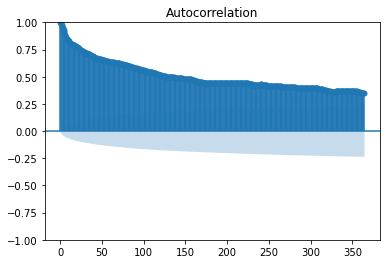

In [139]:
acf_15_364 = plot_acf(df_15["weibull_jd"], lags=364)  # 1 year
plt.show()

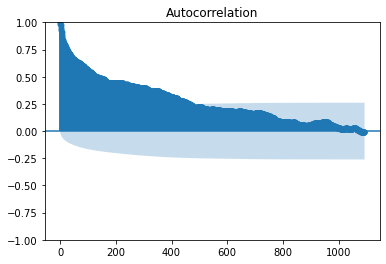

In [140]:
acf_15_1093 = plot_acf(df_15["weibull_jd"], lags=1093)  # 3 years
plt.show()

/Users/matthewthompson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


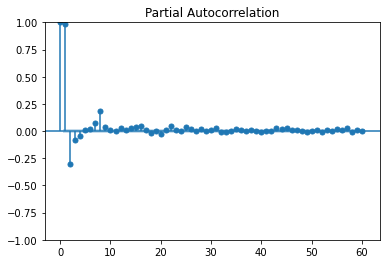

In [141]:
pacf_15_60 = plot_pacf(df_15["weibull_jd"], lags=60)  # 2 months
plt.show()

/Users/matthewthompson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


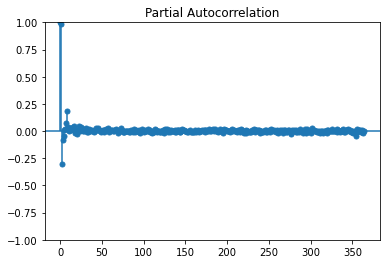

In [142]:
pacf_15_364 = plot_pacf(df_15["weibull_jd"], lags=364)  # 1 year
plt.show()

### Checking if Data is Stationary

In [143]:
adf = adfuller(df_15["weibull_jd"])
print("Augmented Dickey-Fuller Test Statistic: %f" % adf[0])
print("p-value: %f" % adf[1])

print("critical values at different levels:")
for k, v in adf[4].items():
    print("\t%s: %.3f" % (k, v))

Augmented Dickey-Fuller Test Statistic: -6.541083
p-value: 0.000000
critical values at different levels:
	1%: -3.431
	5%: -2.862
	10%: -2.567


P-value rounds to 0.00 because it is so small. Our data is stationary.

### Decomposition: Period = 7-days; Variable = "weibull_jd"

A period of 30-days explores the weekly seasonality of our daily data.

In [144]:
decomp_15_7 = STL(df_15["weibull_jd"], period=7).fit()

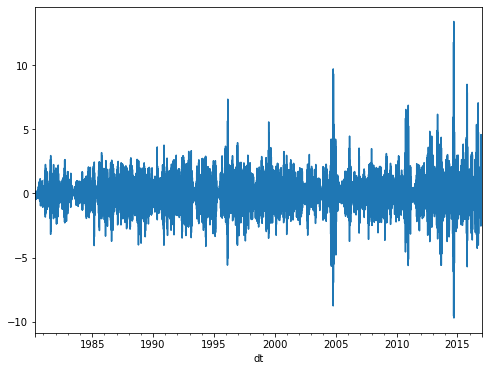

In [145]:
plt.figure(figsize=(8,6))
decomp_15_7.seasonal.plot()
plt.show()

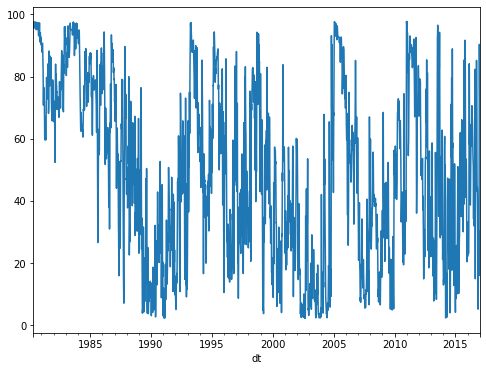

In [146]:
plt.figure(figsize=(8,6))
decomp_15_7.trend.plot()
plt.show()

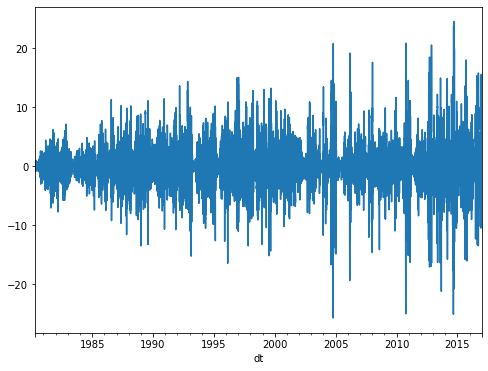

In [147]:
plt.figure(figsize=(8,6))
decomp_15_7.resid.plot()
plt.show()

### Decomposition: Period = 30-days; Variable = "weibull_jd"

A period of 30-days explores the monthly seasonality of our daily data.

In [148]:
decomp_15_30 = STL(df_15["weibull_jd"], period=30).fit()

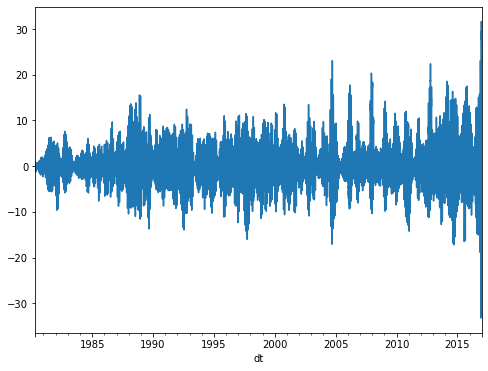

In [149]:
plt.figure(figsize=(8,6))
decomp_15_30.seasonal.plot()
plt.show()

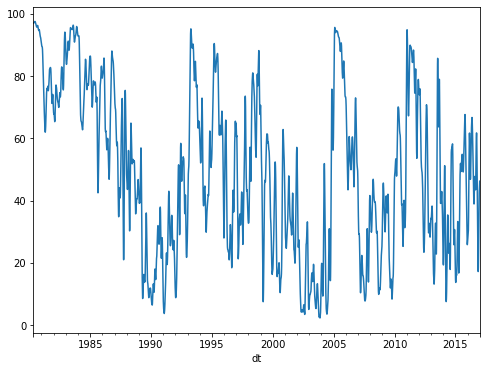

In [150]:
plt.figure(figsize=(8,6))
decomp_15_30.trend.plot()
plt.show()

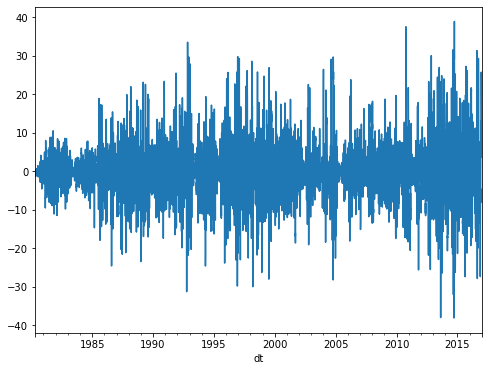

In [151]:
plt.figure(figsize=(8,6))
decomp_15_30.resid.plot()
plt.show()

### Decomposition: Period = 364-days; Variable = "weibull_jd"

A period of 364-days explores the yearly seasonality of our daily data.

In [152]:
decomp_15_364 = STL(df_15["weibull_jd"], period=364).fit()

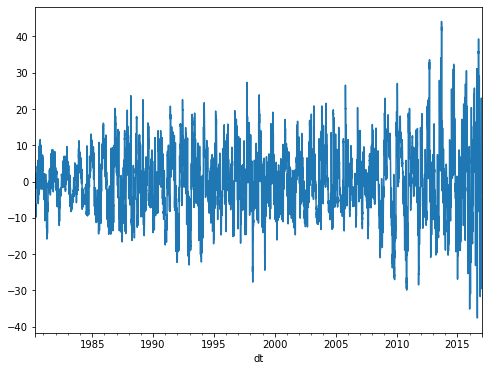

In [153]:
plt.figure(figsize=(8,6))
decomp_15_364.seasonal.plot()
plt.show()

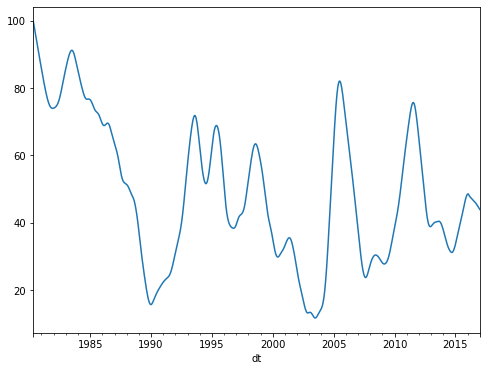

In [154]:
plt.figure(figsize=(8,6))
decomp_15_364.trend.plot()
plt.show()

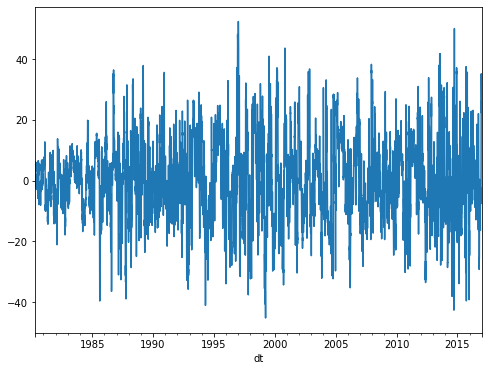

In [155]:
plt.figure(figsize=(8,6))
decomp_15_364.resid.plot()
plt.show()

### Decomposition: Period = 1821-days; Variable = "weibull_jd"

A period of 1821-days explores the 5-yearly seasonality of our daily data.

In [156]:
decomp_15_1821 = STL(df_15["weibull_jd"], period=1821).fit()

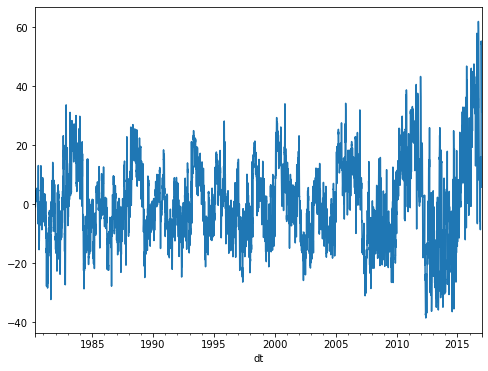

In [157]:
plt.figure(figsize=(8,6))
decomp_15_1821.seasonal.plot()
plt.show()

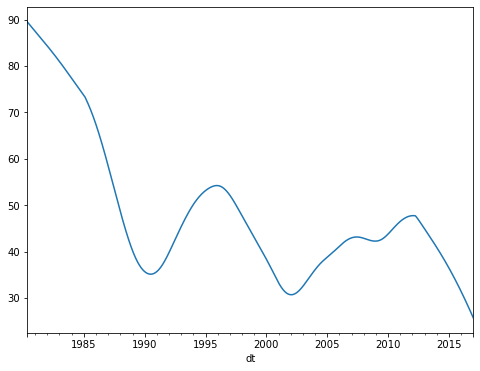

In [158]:
plt.figure(figsize=(8,6))
decomp_15_1821.trend.plot()
plt.show()

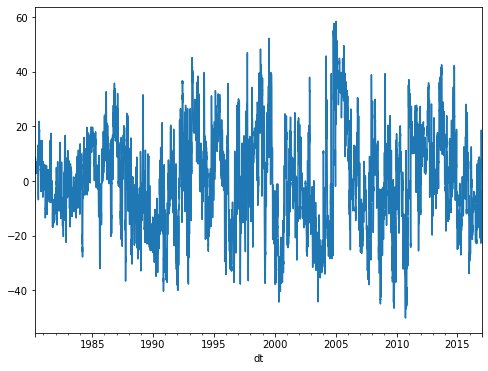

In [159]:
plt.figure(figsize=(8,6))
decomp_15_1821.resid.plot()
plt.show()

### Decomposition: Period = 3642-days; Variable = "weibull_jd"

A period of 3642-days explores the 10-yearly seasonality of our daily data.

In [160]:
decomp_15_3642 = STL(df_15["weibull_jd"], period=3642).fit()

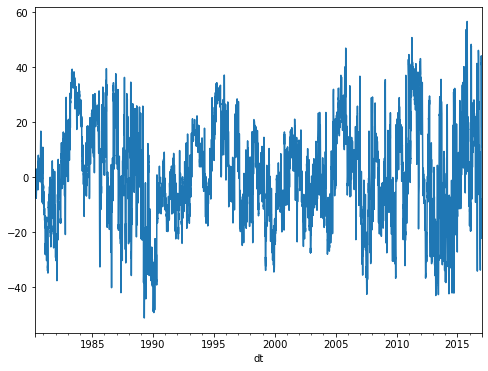

In [161]:
plt.figure(figsize=(8,6))
decomp_15_3642.seasonal.plot()
plt.show()

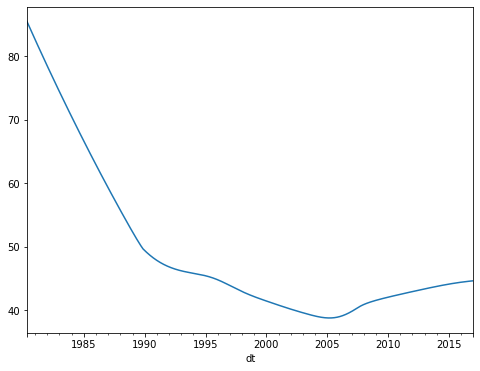

In [162]:
plt.figure(figsize=(8,6))
decomp_15_3642.trend.plot()
plt.show()

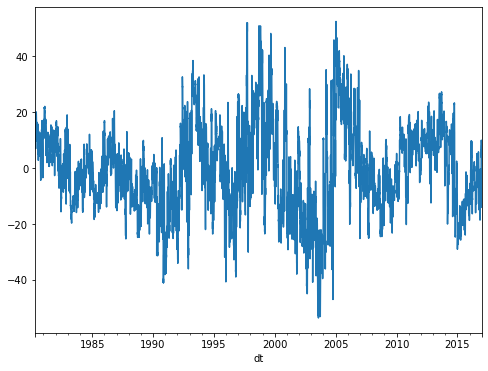

In [163]:
plt.figure(figsize=(8,6))
decomp_15_3642.resid.plot()
plt.show()

### Gauge in Region 17: Pacific Northwest

In [164]:
df_17.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13394 entries, 1980-05-01 to 2016-12-31
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   value         13394 non-null  int64  
 1   jd            13394 non-null  int64  
 2   mean_value    13394 non-null  float64
 3   weibull_site  13394 non-null  float64
 4   weibull_jd    13394 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 627.8 KB


In [165]:
df_17.describe()

value            jd    mean_value  weibull_site    weibull_jd
count  13394.000000  13394.000000  13394.000000  13394.000000  13394.000000
mean     627.236598    184.238764    627.616129     49.378158     48.294832
std      692.424974    105.227462    684.312414     28.980259     28.219111
min       90.000000      1.000000    115.714300      0.006844      2.439024
25%      222.000000     94.000000    223.714300     24.262542     24.390244
50%      331.000000    185.000000    332.142900     49.045240     46.341463
75%      701.750000    275.000000    712.821425     74.640682     73.170732
max     5700.000000    366.000000   5430.000000     99.952091     97.560976

In [166]:
df_17.head(5)

value   jd  mean_value  weibull_site  weibull_jd
dt                                                          
1980-05-01   2020  122   1894.2857     92.745192   95.121951
1980-05-02   1960  123   1924.2857     93.018958   95.121951
1980-05-03   1750  124   1902.8571     92.820478   95.121951
1980-05-04   1910  125   1910.0000     92.882075   92.682927
1980-05-05   1980  126   1920.0000     92.984738   90.243902

Text(0.5, 1.0, 'Streamflow Julian Date Percentile from 1980-2020: Pacific Northwest')

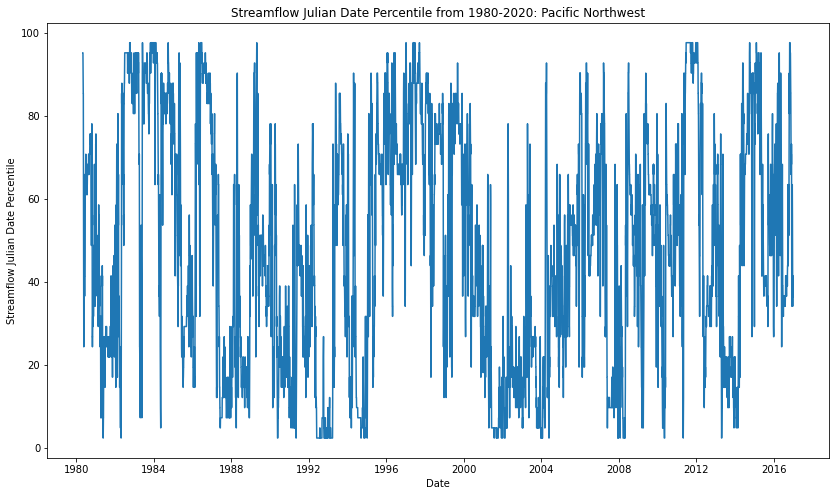

In [167]:
plt.figure(figsize=(14,8))
plt.plot(df_17.index, df_17["weibull_jd"])
plt.xlabel("Date")
plt.ylabel("Streamflow Julian Date Percentile")
plt.title("Streamflow Julian Date Percentile from 1980-2020: Pacific Northwest")

### Autocorrelation/Partial Autocorrelation

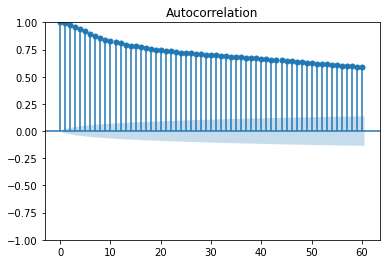

In [168]:
acf_17_60 = plot_acf(df_17["weibull_jd"], lags=60)  # 2 months
plt.show()

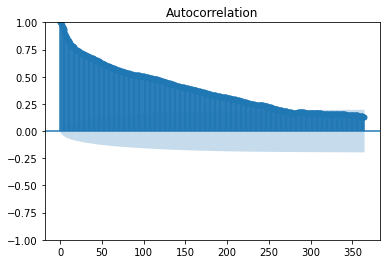

In [169]:
acf_17_364 = plot_acf(df_17["weibull_jd"], lags=364)  # 1 year
plt.show()

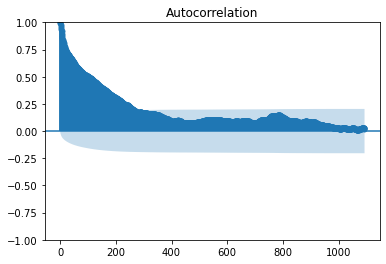

In [170]:
acf_17_1093 = plot_acf(df_17["weibull_jd"], lags=1093)  # 3 years
plt.show()

/Users/matthewthompson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


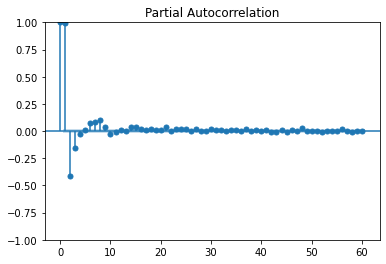

In [171]:
pacf_17_60 = plot_pacf(df_17["weibull_jd"], lags=60)  # 2 months
plt.show()

/Users/matthewthompson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


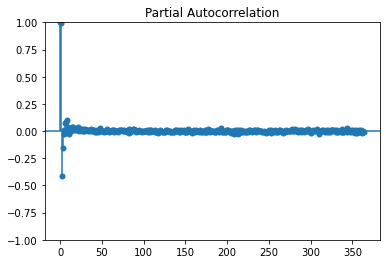

In [172]:
acf_17_364 = plot_pacf(df_17["weibull_jd"], lags=364)  # 1 year
plt.show()

### Checking if Data is Stationary

In [173]:
adf = adfuller(df_17["weibull_jd"])
print("Augmented Dickey-Fuller Test Statistic: %f" % adf[0])
print("p-value: %f" % adf[1])

print("critical values at different levels:")
for k, v in adf[4].items():
    print("\t%s: %.3f" % (k, v))

Augmented Dickey-Fuller Test Statistic: -7.151823
p-value: 0.000000
critical values at different levels:
	1%: -3.431
	5%: -2.862
	10%: -2.567


P-value rounds to 0.00 because it is so small. Our data is stationary.

### Decomposition: Period = 7-days; Variable = "weibull_jd"

A period of 30-days explores the weekly seasonality of our daily data.

In [174]:
decomp_17_7 = STL(df_17["weibull_jd"], period=7).fit()

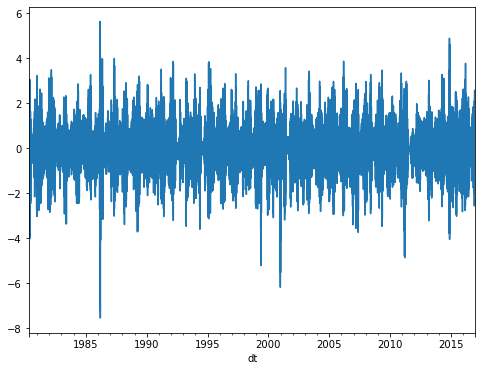

In [175]:
plt.figure(figsize=(8,6))
decomp_17_7.seasonal.plot()
plt.show()

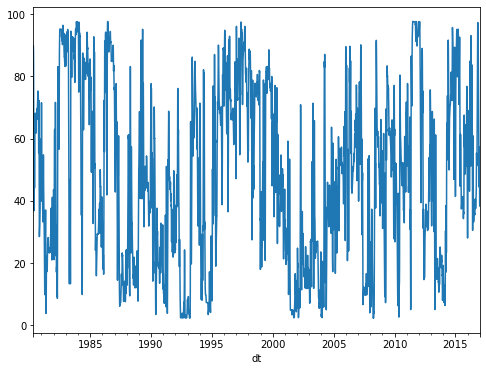

In [176]:
plt.figure(figsize=(8,6))
decomp_17_7.trend.plot()
plt.show()

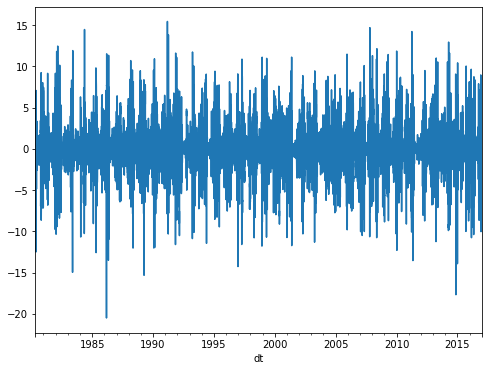

In [177]:
plt.figure(figsize=(8,6))
decomp_17_7.resid.plot()
plt.show()

### Decomposition: Period = 30-days; Variable = "weibull_jd"

A period of 30-days explores the monthly seasonality of our daily data.

In [178]:
decomp_17_30 = STL(df_17["weibull_jd"], period=30).fit()

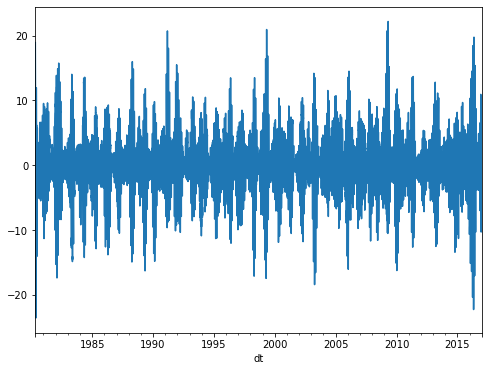

In [179]:
plt.figure(figsize=(8,6))
decomp_17_30.seasonal.plot()
plt.show()

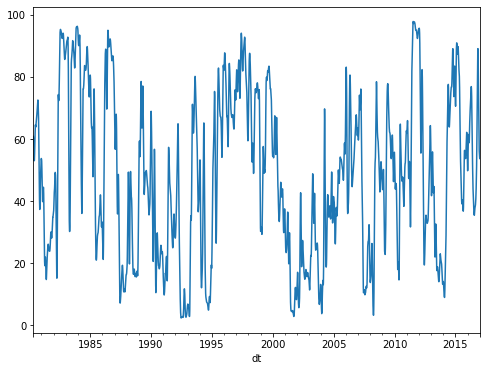

In [180]:
plt.figure(figsize=(8,6))
decomp_17_30.trend.plot()
plt.show()

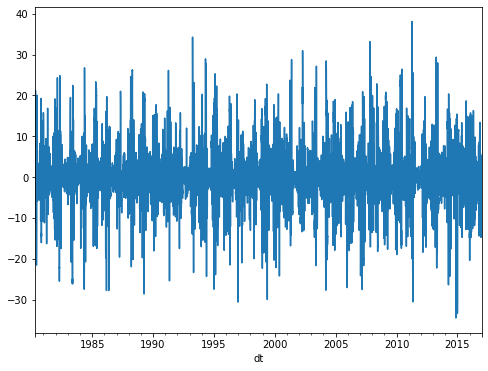

In [181]:
plt.figure(figsize=(8,6))
decomp_17_30.resid.plot()
plt.show()

### Decomposition: Period = 364-days; Variable = "weibull_jd"

A period of 364-days explores the yearly seasonality of our daily data.

In [182]:
decomp_17_364 = STL(df_17["weibull_jd"], period=364).fit()

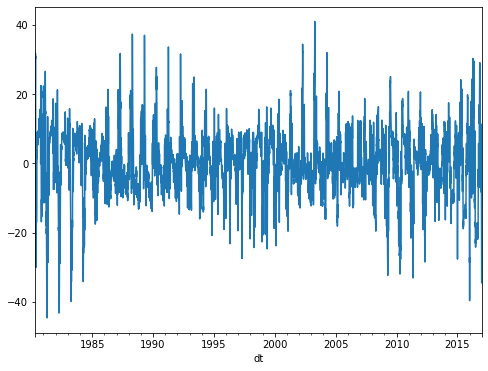

In [183]:
plt.figure(figsize=(8,6))
decomp_17_364.seasonal.plot()
plt.show()

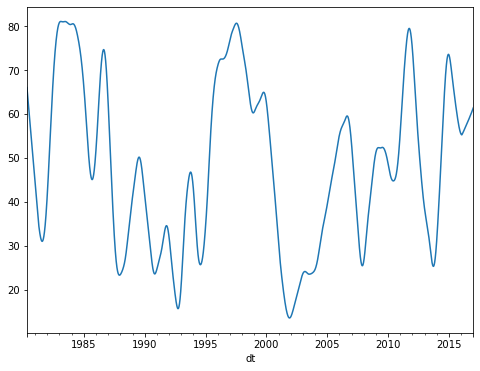

In [184]:
plt.figure(figsize=(8,6))
decomp_17_364.trend.plot()
plt.show()

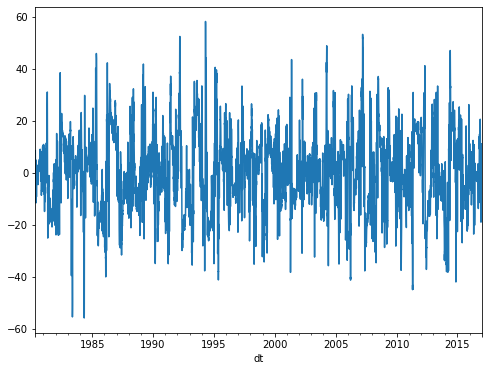

In [185]:
plt.figure(figsize=(8,6))
decomp_17_364.resid.plot()
plt.show()

### Decomposition: Period = 1821-days; Variable = "weibull_jd"

A period of 1821-days explores the 5-yearly seasonality of our daily data.

In [186]:
decomp_17_1821 = STL(df_17["weibull_jd"], period=1821).fit()

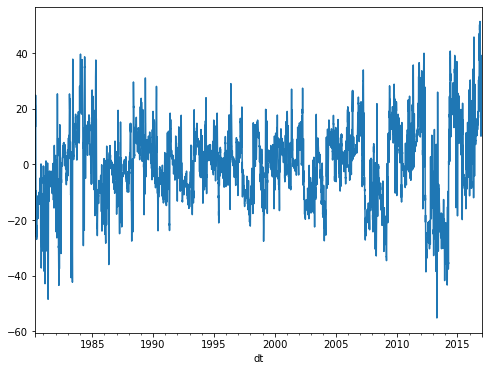

In [187]:
plt.figure(figsize=(8,6))
decomp_17_1821.seasonal.plot()
plt.show()

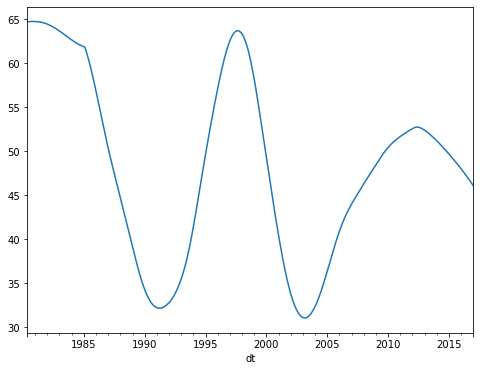

In [188]:
plt.figure(figsize=(8,6))
decomp_17_1821.trend.plot()
plt.show()

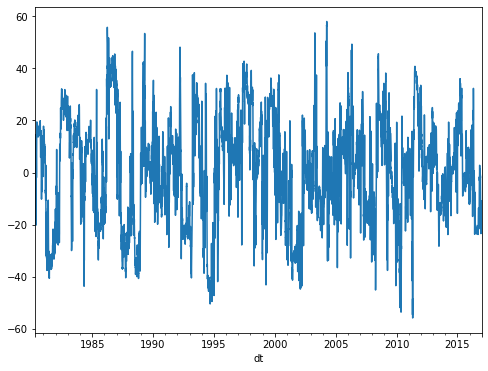

In [189]:
plt.figure(figsize=(8,6))
decomp_17_1821.resid.plot()
plt.show()

### Decomposition: Period = 3642-days; Variable = "weibull_jd"

A period of 3642-days explores the 10-yearly seasonality of our daily data.

In [190]:
decomp_17_3642 = STL(df_17["weibull_jd"], period=3642).fit()

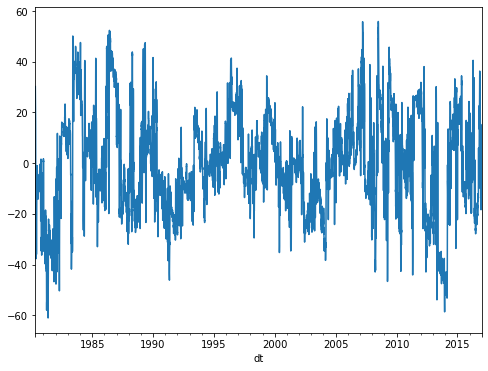

In [191]:
plt.figure(figsize=(8,6))
decomp_17_3642.seasonal.plot()
plt.show()

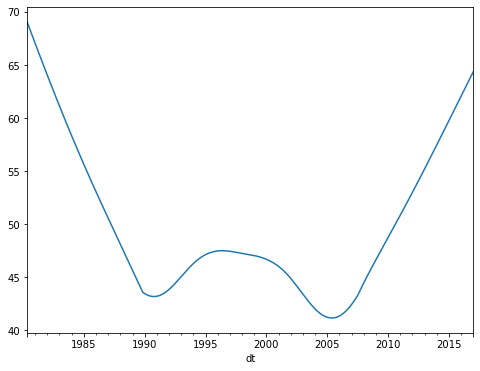

In [192]:
plt.figure(figsize=(8,6))
decomp_17_3642.trend.plot()
plt.show()

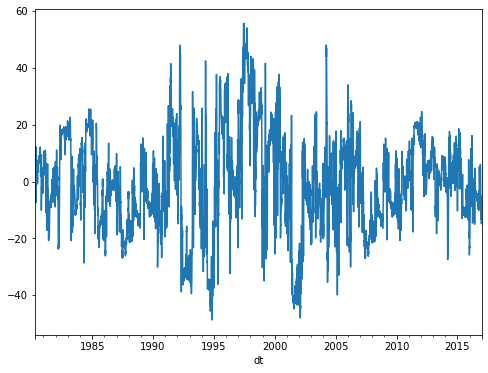

In [193]:
plt.figure(figsize=(8,6))
decomp_17_3642.resid.plot()
plt.show()

## Plot Comparisons Across Each Gauge

### Time Series

In [194]:
df_10U_smooth = df_10U.resample('Y').mean()
df_11_smooth = df_11.resample('Y').mean()
df_13_smooth = df_13.resample('Y').mean()
df_14_smooth = df_14.resample('Y').mean()
df_15_smooth = df_15.resample('Y').mean()
df_17_smooth = df_17.resample('Y').mean()

(0.0, 100.0)

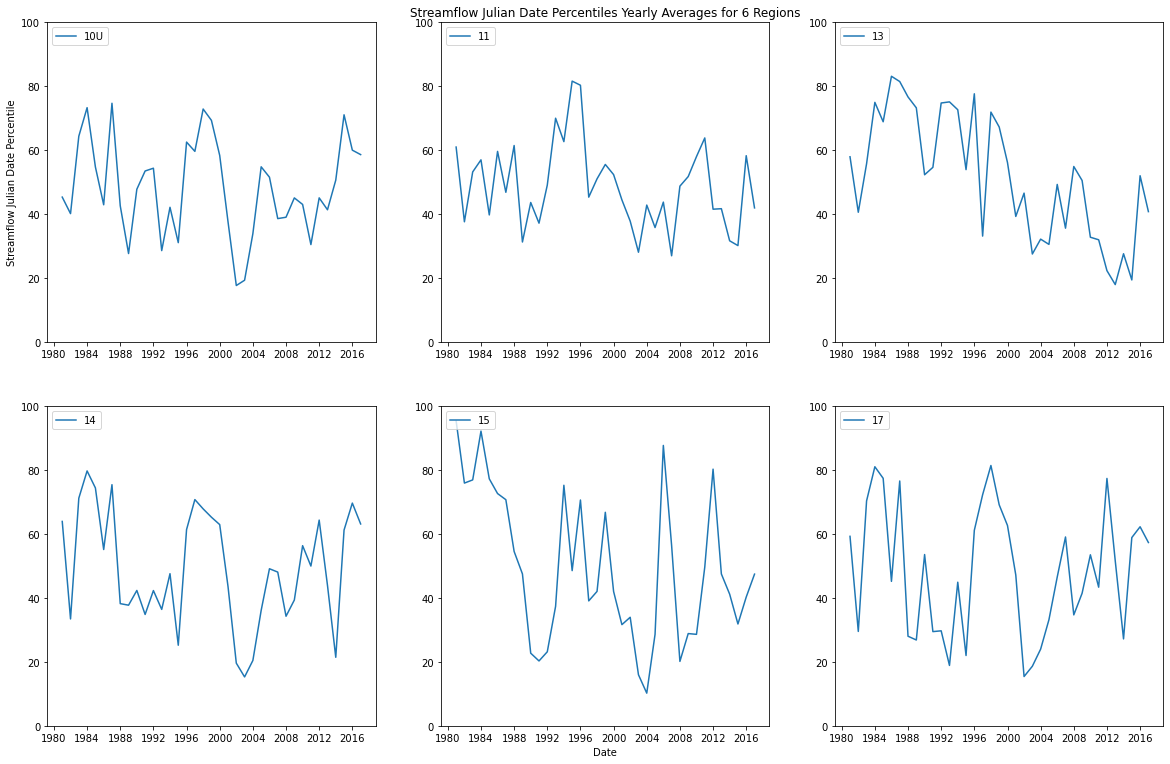

In [195]:
plt.figure(figsize=(20, 20))
plt.subplot(331)
plt.plot(df_10U_smooth.index, df_10U_smooth["weibull_jd"], label="10U")
plt.legend(loc="upper left")
plt.ylim(0, 100)
plt.ylabel("Streamflow Julian Date Percentile")

plt.subplot(332)
plt.plot(df_11_smooth.index, df_11_smooth["weibull_jd"], label="11")
plt.legend(loc="upper left")
plt.ylim(0, 100)
plt.title("Streamflow Julian Date Percentiles Yearly Averages for 6 Regions")

plt.subplot(333)
plt.plot(df_13_smooth.index, df_13_smooth["weibull_jd"], label="13")
plt.legend(loc="upper left")
plt.ylim(0, 100)

plt.subplot(334)
plt.plot(df_14_smooth.index, df_14_smooth["weibull_jd"], label="14")
plt.legend(loc="upper left")
plt.ylim(0, 100)

plt.subplot(335)
plt.plot(df_15_smooth.index, df_15_smooth["weibull_jd"], label="15")
plt.legend(loc="upper left")
plt.ylim(0, 100)
plt.xlabel("Date")

plt.subplot(336)
plt.plot(df_17_smooth.index, df_17_smooth["weibull_jd"], label="17")
plt.legend(loc="upper left")
plt.ylim(0, 100)

Text(0.5, 1.0, 'Streamflow Julian Date Percentiles Yearly Averages for 6 Regions')

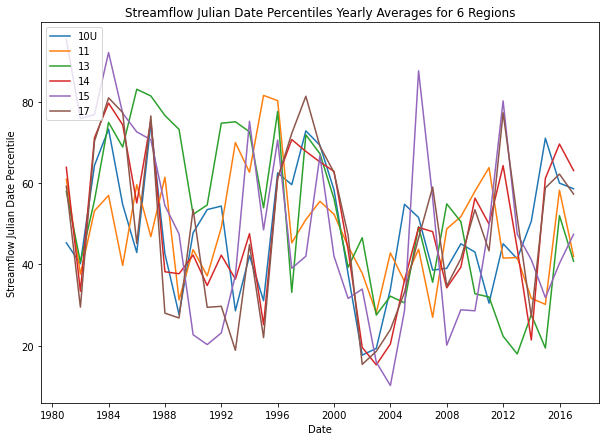

In [196]:
plt.figure(figsize=(10, 7))
plt.plot(df_10U_smooth.index, df_10U_smooth["weibull_jd"], label="10U")
plt.plot(df_11_smooth.index, df_11_smooth["weibull_jd"], label="11")
plt.plot(df_13_smooth.index, df_13_smooth["weibull_jd"], label="13")
plt.plot(df_14_smooth.index, df_14_smooth["weibull_jd"], label="14")
plt.plot(df_15_smooth.index, df_15_smooth["weibull_jd"], label="15")
plt.plot(df_17_smooth.index, df_17_smooth["weibull_jd"], label="17")
plt.xlabel("Date")
plt.ylabel("Streamflow Julian Date Percentile")
plt.legend(loc="upper left")
plt.title("Streamflow Julian Date Percentiles Yearly Averages for 6 Regions")

### Autocorrelation

<Figure size 1800x1800 with 0 Axes>

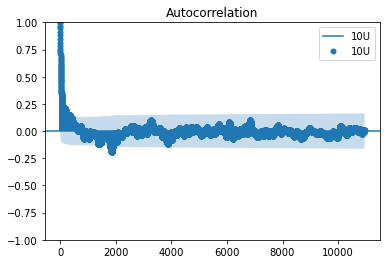

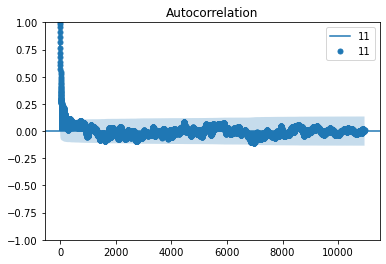

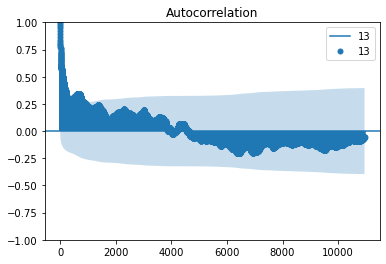

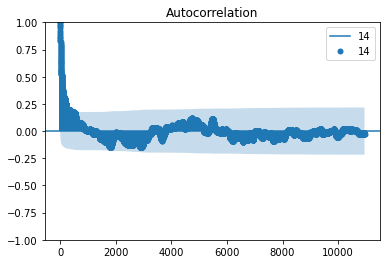

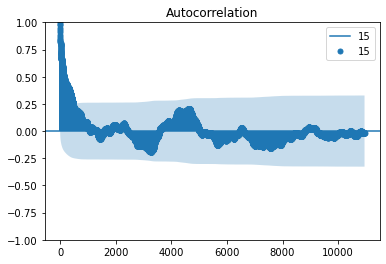

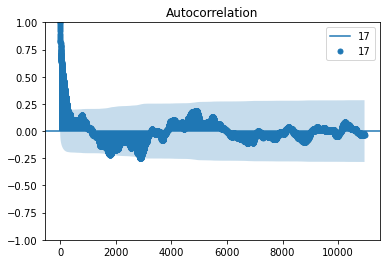

In [204]:
plt.figure(figsize=(25, 25))
plot_acf(df_10U["weibull_jd"], lags=10950, label='10U')
plt.legend()
plot_acf(df_11["weibull_jd"], lags=10950, label='11')
plt.legend()
plot_acf(df_13["weibull_jd"], lags=10950, label='13')
plt.legend()
plot_acf(df_14["weibull_jd"], lags=10950, label='14')
plt.legend()
plot_acf(df_15["weibull_jd"], lags=10950, label='15')
plt.legend()
plot_acf(df_17["weibull_jd"], lags=10950, label='17')
plt.legend()
plt.show()

### Partial Autocorrelation

/Users/matthewthompson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Users/matthewthompson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/Users/matthewthompson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  w

<Figure size 1440x1440 with 0 Axes>

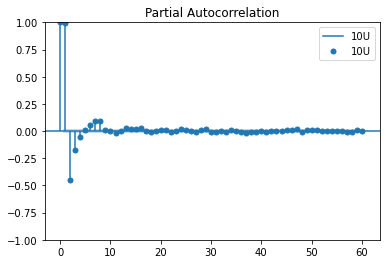

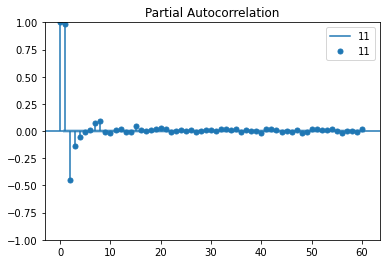

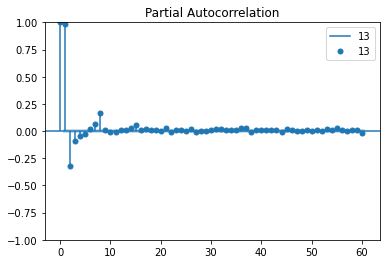

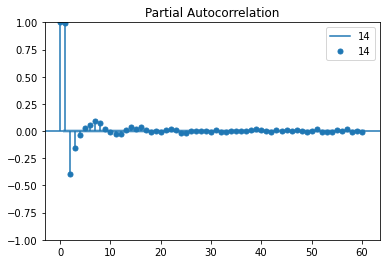

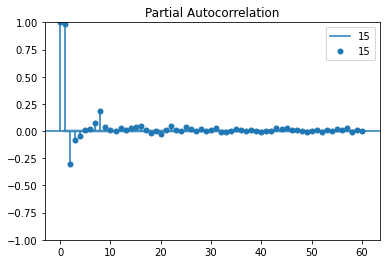

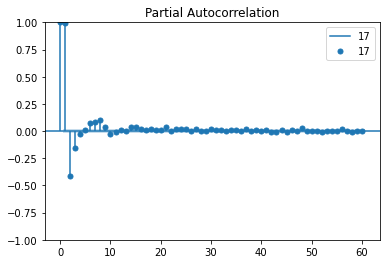

In [198]:
plt.figure(figsize=(20, 20))
plot_pacf(df_10U["weibull_jd"], lags=60, label='10U')
plt.legend()
plot_pacf(df_11["weibull_jd"], lags=60, label='11')
plt.legend()
plot_pacf(df_13["weibull_jd"], lags=60, label='13')
plt.legend()
plot_pacf(df_14["weibull_jd"], lags=60, label='14')
plt.legend()
plot_pacf(df_15["weibull_jd"], lags=60, label='15')
plt.legend()
plot_pacf(df_17["weibull_jd"], lags=60, label='17')
plt.legend()
plt.show()

### Decomposition - Seasonality: Yearly

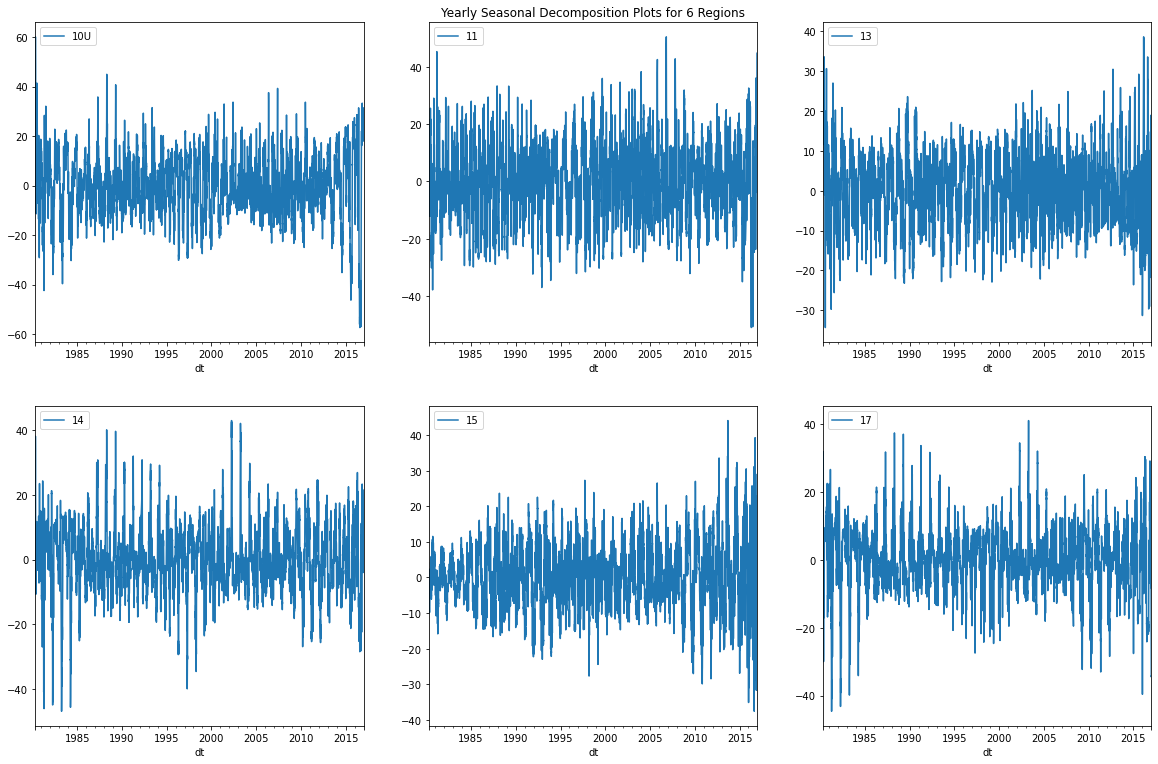

In [199]:
plt.figure(figsize=(20, 20))
plt.subplot(331)
decomp_10U_364.seasonal.plot(label="10U")
plt.legend(loc="upper left")

plt.subplot(332)
decomp_11_364.seasonal.plot(label="11")
plt.legend(loc="upper left")
plt.title("Yearly Seasonal Decomposition Plots for 6 Regions")

plt.subplot(333)
decomp_13_364.seasonal.plot(label="13")
plt.legend(loc="upper left")

plt.subplot(334)
decomp_14_364.seasonal.plot(label="14")
plt.legend(loc="upper left")

plt.subplot(335)
decomp_15_364.seasonal.plot(label="15")
plt.legend(loc="upper left")

plt.subplot(336)
decomp_17_364.seasonal.plot(label="17")
plt.legend(loc="upper left")

### Decomposition - Seasonality: 5-Years

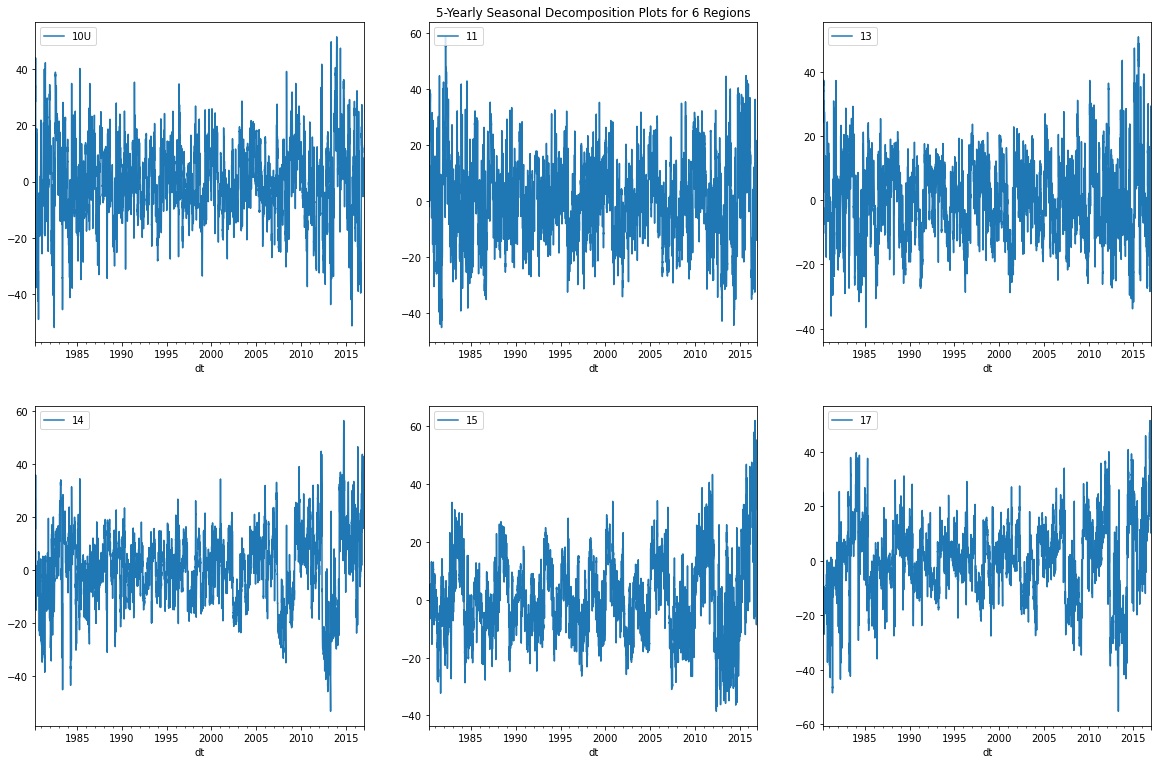

In [200]:
plt.figure(figsize=(20, 20))
plt.subplot(331)
decomp_10U_1821.seasonal.plot(label="10U")
plt.legend(loc="upper left")

plt.subplot(332)
decomp_11_1821.seasonal.plot(label="11")
plt.legend(loc="upper left")
plt.title("5-Yearly Seasonal Decomposition Plots for 6 Regions")

plt.subplot(333)
decomp_13_1821.seasonal.plot(label="13")
plt.legend(loc="upper left")

plt.subplot(334)
decomp_14_1821.seasonal.plot(label="14")
plt.legend(loc="upper left")

plt.subplot(335)
decomp_15_1821.seasonal.plot(label="15")
plt.legend(loc="upper left")

plt.subplot(336)
decomp_17_1821.seasonal.plot(label="17")
plt.legend(loc="upper left")

### Decomposition - Seasonality: 10-Years

(-70.0, 70.0)

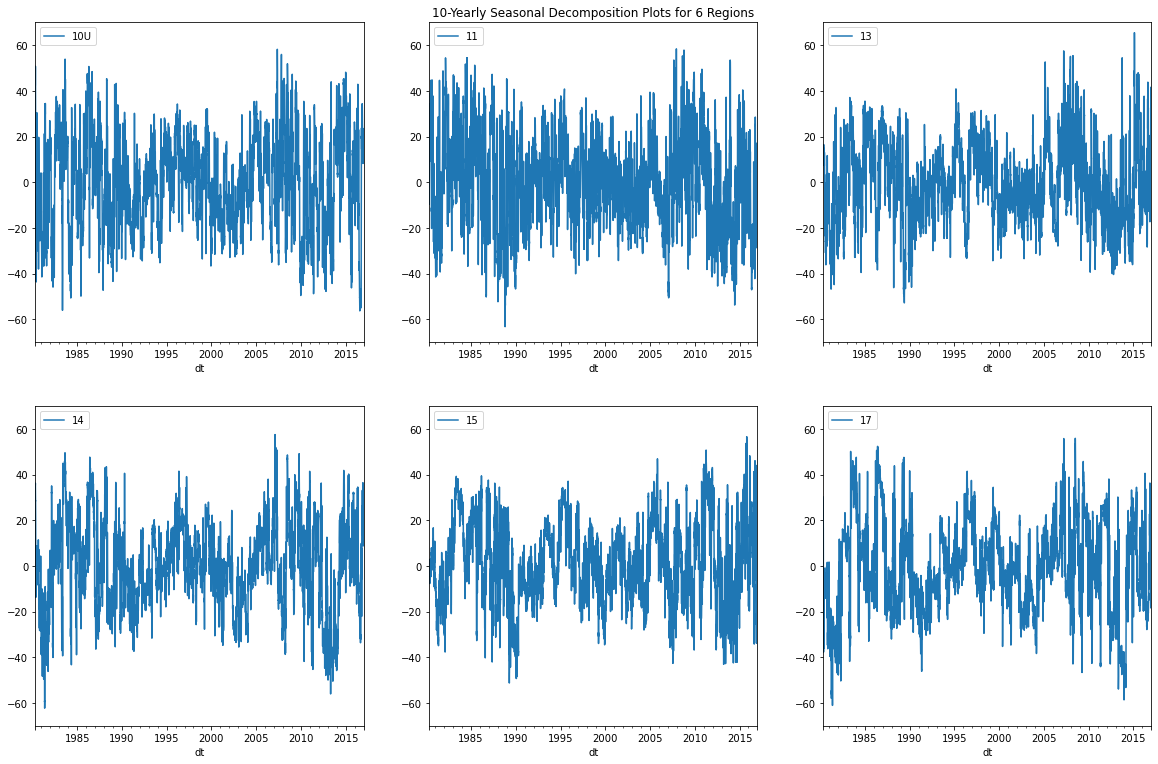

In [201]:
plt.figure(figsize=(20, 20))
plt.subplot(331)
decomp_10U_3642.seasonal.plot(label="10U")
plt.legend(loc="upper left")
plt.ylim(-70, 70)

plt.subplot(332)
decomp_11_3642.seasonal.plot(label="11")
plt.legend(loc="upper left")
plt.ylim(-70, 70)
plt.title("10-Yearly Seasonal Decomposition Plots for 6 Regions")

plt.subplot(333)
decomp_13_3642.seasonal.plot(label="13")
plt.legend(loc="upper left")
plt.ylim(-70, 70)

plt.subplot(334)
decomp_14_3642.seasonal.plot(label="14")
plt.legend(loc="upper left")
plt.ylim(-70, 70)

plt.subplot(335)
decomp_15_3642.seasonal.plot(label="15")
plt.legend(loc="upper left")
plt.ylim(-70, 70)

plt.subplot(336)
decomp_17_3642.seasonal.plot(label="17")
plt.legend(loc="upper left")
plt.ylim(-70, 70)

### Decomposition - Trend: Yearly

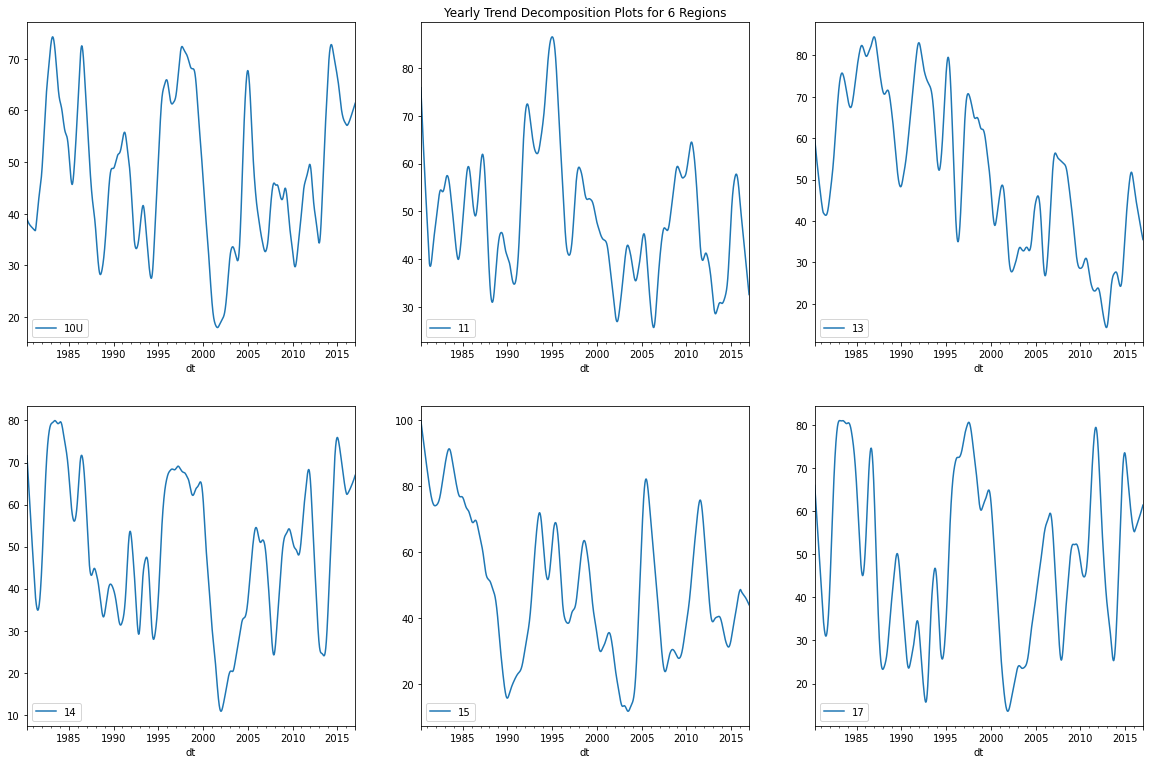

In [202]:
plt.figure(figsize=(20, 20))
plt.subplot(331)
decomp_10U_364.trend.plot(label="10U")
plt.legend(loc="lower left")

plt.subplot(332)
decomp_11_364.trend.plot(label="11")
plt.legend(loc="lower left")
plt.title("Yearly Trend Decomposition Plots for 6 Regions")

plt.subplot(333)
decomp_13_364.trend.plot(label="13")
plt.legend(loc="lower left")

plt.subplot(334)
decomp_14_364.trend.plot(label="14")
plt.legend(loc="lower left")

plt.subplot(335)
decomp_15_364.trend.plot(label="15")
plt.legend(loc="lower left")

plt.subplot(336)
decomp_17_364.trend.plot(label="17")
plt.legend(loc="lower left")

### Decomposition - Trend: 5-Yearly

(20.0, 90.0)

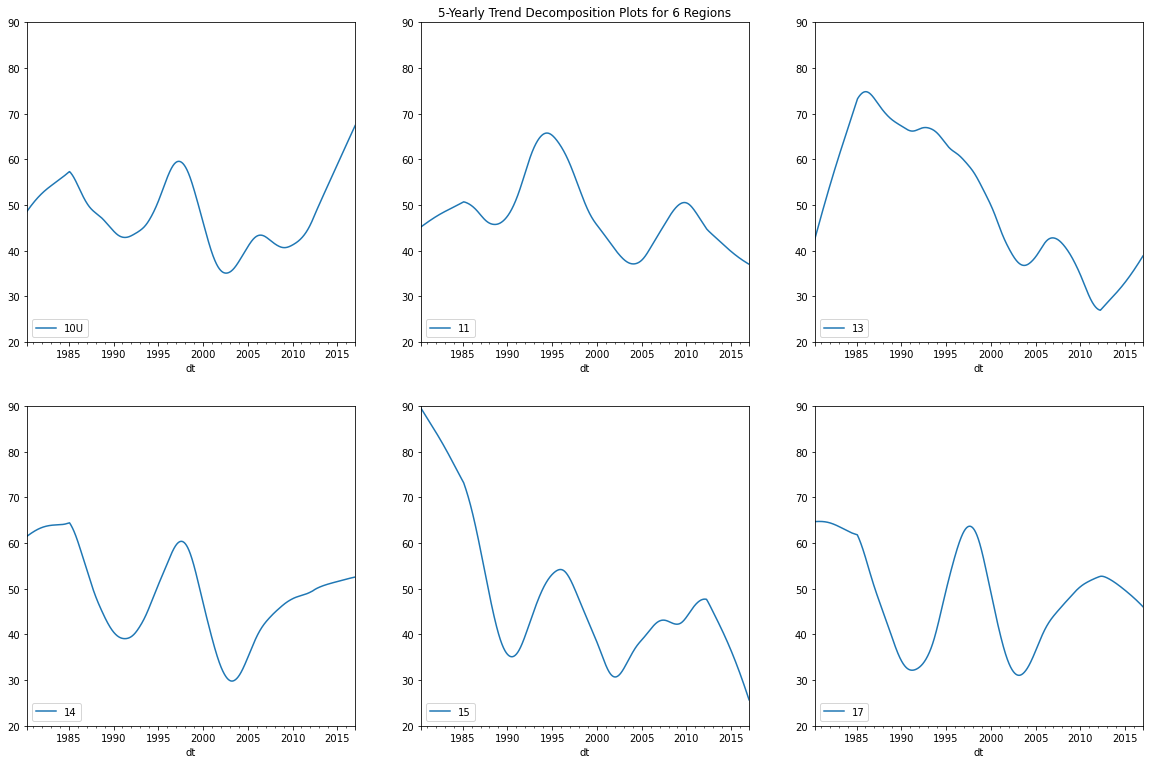

In [203]:
plt.figure(figsize=(20, 20))
plt.subplot(331)
decomp_10U_1821.trend.plot(label="10U")
plt.legend(loc="lower left")
plt.ylim(20, 90)

plt.subplot(332)
decomp_11_1821.trend.plot(label="11")
plt.legend(loc="lower left")
plt.ylim(20, 90)
plt.title("5-Yearly Trend Decomposition Plots for 6 Regions")

plt.subplot(333)
decomp_13_1821.trend.plot(label="13")
plt.legend(loc="lower left")
plt.ylim(20, 90)

plt.subplot(334)
decomp_14_1821.trend.plot(label="14")
plt.legend(loc="lower left")
plt.ylim(20, 90)

plt.subplot(335)
decomp_15_1821.trend.plot(label="15")
plt.legend(loc="lower left")
plt.ylim(20, 90)

plt.subplot(336)
decomp_17_1821.trend.plot(label="17")
plt.legend(loc="lower left")
plt.ylim(20, 90)